In [1]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from rdkit.Chem import Descriptors
from rdkit.Chem.MolStandardize import rdMolStandardize
enumerator = rdMolStandardize.TautomerEnumerator()
uncharger = rdMolStandardize.Uncharger() 

from rdkit.Chem import PandasTools

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import numpy as np

## Functions

In [2]:
def RemoveSymDups(smi,mol):
    resulting_product_smiles=set()
    resulting_mols=[]
    if smi not in resulting_product_smiles:
        resulting_product_smiles.add(smi)
        resulting_mols.append(mol)
    return resulting_mols

In [3]:
def GetCanonicalTautomer(df):
    #read in data file
    #df=pd.read_excel(file)
    
    #abbreviate RDKit method path
    enumerator = rdMolStandardize.TautomerEnumerator()
    uncharger = rdMolStandardize.Uncharger() 
    
    #make empty lsit to store standard smiles
    prod=[]
     
    #loop through product smiles, convert them to canonical format, save them to list
    for i in df['Product1']:
        if i is not np.nan:
            m=i.replace('/','').replace('\\','').replace('@','')
            m=Chem.MolFromSmiles(m)
            if m is not None:
                uncharged_m = uncharger.uncharge(m)
                cmol=enumerator.Canonicalize(uncharged_m)
                prod.append((Chem.MolToSmiles(cmol)))
            else:
                prod.append('FIX')
        else:
            prod.append('NA')
        
  
    #make new columns in dataframe and add the canonical formats for parent and product smiles
    df['std_Product1']=prod

    return df

In [4]:
def CanonicalizeMol(mol):
    uncharged_mol = uncharger.uncharge(mol)
    cmol=enumerator.Canonicalize(uncharged_mol)
    canSmile=Chem.MolToSmiles(cmol)
    m=canSmile.replace('/','').replace('\\','').replace('@','').replace('[','').replace(']','')
    return m

#### set working directory to folder with reaction files

In [5]:
path = r'C:\Users\LSHIELDS\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\MyResearch\CTS_doc\CTS_modernization\rxnFiles'

os.chdir(path)
os.getcwd()

'C:\\Users\\LSHIELDS\\OneDrive - Environmental Protection Agency (EPA)\\Profile\\Documents\\MyResearch\\CTS_doc\\CTS_modernization\\rxnFiles'

#### Example data

In [6]:
examples=pd.read_excel(r'C:\Users\LSHIELDS\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\MyResearch\CTS_doc\CTS_modernization\Hydrolysis_examples.xlsx')

In [7]:
ex=GetCanonicalTautomer(examples)

[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Running Uncharger
[08:54:55] Run

## Run a reaction with no rules
### AbiHyd: Epoxide Hydrolysis

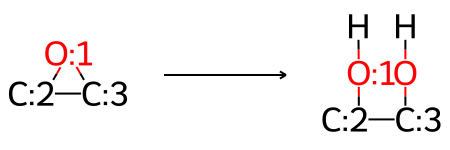

In [8]:
rxn=AllChem.ReactionFromRxnFile('Hydrolysis_v1.8_wSpRxn5.rxn')
rxn

#### Run all examples with reaction to see if the expected product is produced

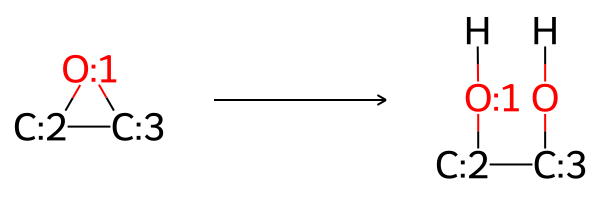

EXAMPLE


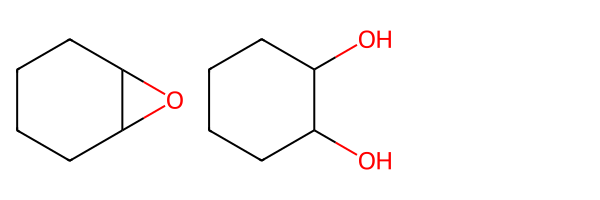

PREDICTED


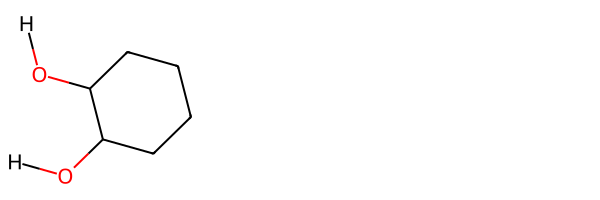

EXAMPLE


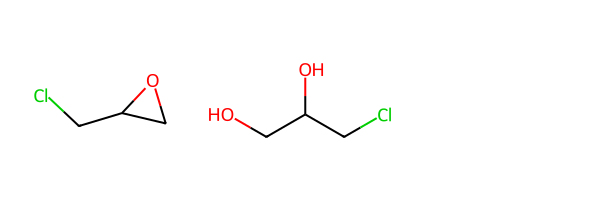

PREDICTED


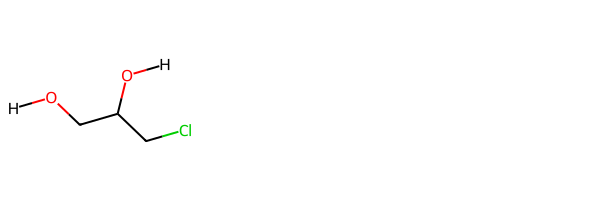

EXAMPLE


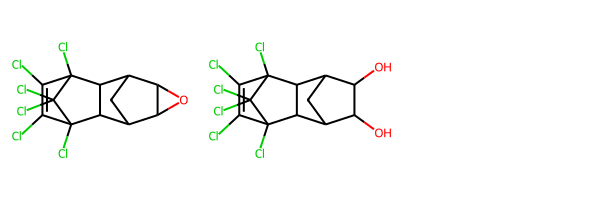

PREDICTED


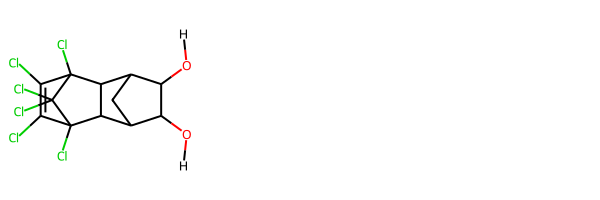

EXAMPLE


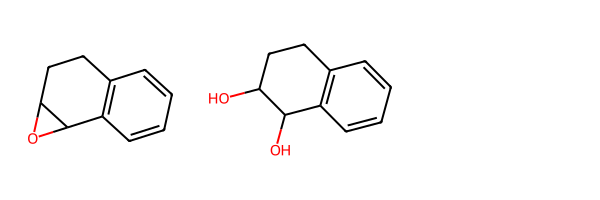

PREDICTED


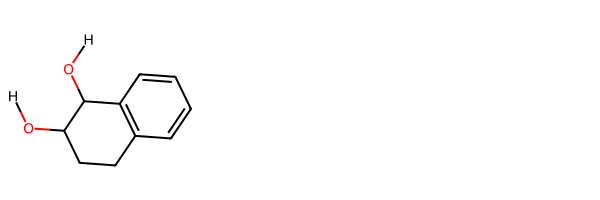

In [9]:
display(Draw.ReactionToImage(rxn))

for x in examples[examples['ID']==5].index:
    par=examples['Parent'][x]
    prod=examples['Product1'][x]
    parent=Chem.MolFromSmiles(par)
    product=Chem.MolFromSmiles(prod)
    print('EXAMPLE')
    display(Draw.MolsToGridImage([parent,product]))

    #chemical transformation
    ps=rxn.RunReactants((parent,))

    #loop through products, remove any duplicates due to symmetrical reaction center
    for i in range(len(ps)):
        current_mol=ps[i][0]
        smi=Chem.MolToSmiles(current_mol)
        final=RemoveSymDups(smi,current_mol)
    
    #print structure
    print('PREDICTED')
    display(Chem.Draw.MolsToGridImage(final))

## Run an reaction with rules
### AbiHyd: Anhydride Hydrolysis & AbiHyd: Cyclic Anhydride Hydrolysis
Contains a reactivtiy rule to distinguish from cylic anhydride scheme and a selectivity rule to elimenate duplicate prducts due to symmetry at reaction center

- anhydride_ID==9
- cyclic_ID==21.

In [10]:
## rerewite reaction in SMIRKS to distinguish between the two reactions
## the selectivity rule can be handled using 

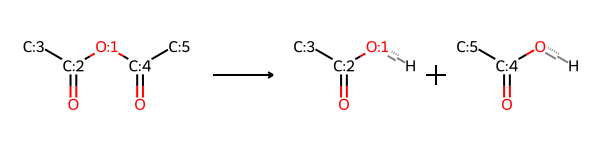

In [11]:
anhydride=AllChem.ReactionFromSmarts('[#6:3]-[#6:2](=O)-[#8:1]-[#6:4](-[#6:5])=O>>[H][#8:1]-[#6:2](-[#6:3])=O.[H][#8]-[#6:4](-[#6:5])=O')
anhydride

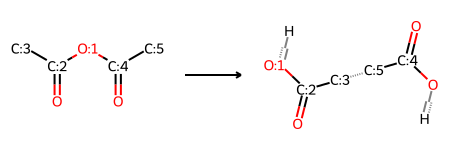

In [12]:
cyclic=AllChem.ReactionFromSmarts('[#6R:3]-[#6R:2](=O)-[#8R:1]-[#6R:4](-[#6R:5])=O>>[H][#8:1]-[#6:2](=O)-[#6:3]~[#6:5]-[#6:4](=O)-[#8][H]')
#cyclic=AllChem.ReactionFromSmarts('O=[#6:2]-1-[#6:3]-[#6]-[#6:5]-[#6:4](=O)-[#8:1]-1>>[H][#8:1]-[#6:2](=O)-[#6:3]-[#6]-[#6:5]-[#6:4](=O)-[#8][H]')
cyclic

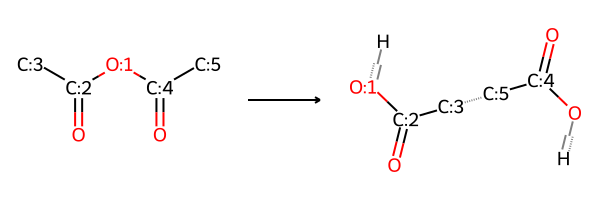

EXAMPLE


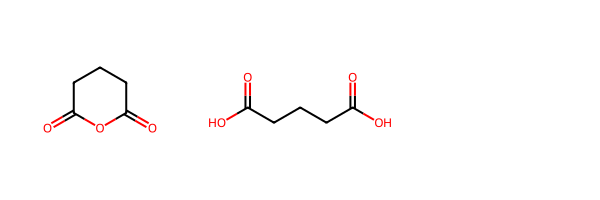

PREDICTED


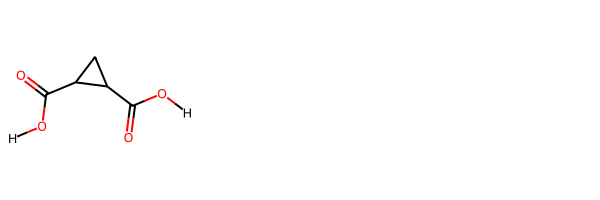

EXAMPLE


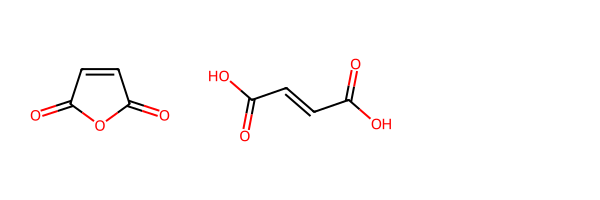

PREDICTED


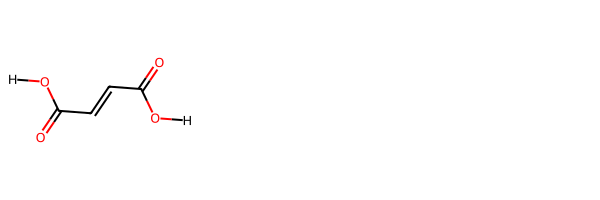

EXAMPLE


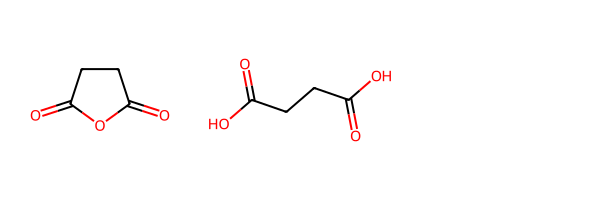

PREDICTED


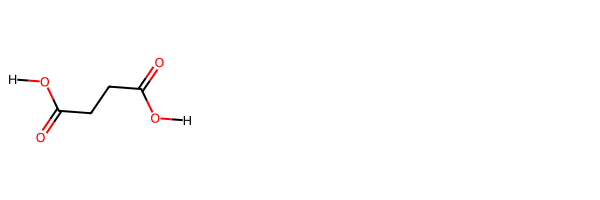

EXAMPLE


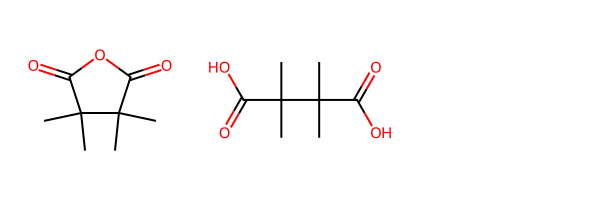

PREDICTED


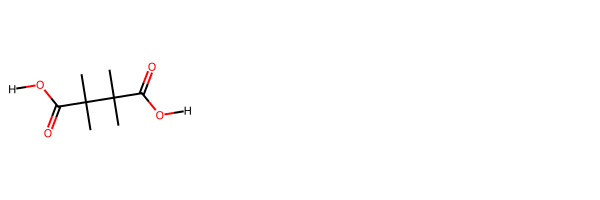

In [13]:
display(Draw.ReactionToImage(cyclic))

for x in examples[examples['ID']==21].index:
    par=examples['Parent'][x]
    prod=examples['Product1'][x]
    parent=Chem.MolFromSmiles(par)
    product=Chem.MolFromSmiles(prod)
    print('EXAMPLE')
    display(Draw.MolsToGridImage([parent,product]))
    
    ps=cyclic.RunReactants((parent,))
    
    for i in range(len(ps)):
        current_mol=ps[i][0]
        smi=Chem.MolToSmiles(current_mol)
        final=RemoveSymDups(smi,current_mol)

    print('PREDICTED')
    display(Chem.Draw.MolsToGridImage(final))

## Run full library and examples

AbiHyd: Nucleophilic Substitution (no adjacent X)
EXAMPLE


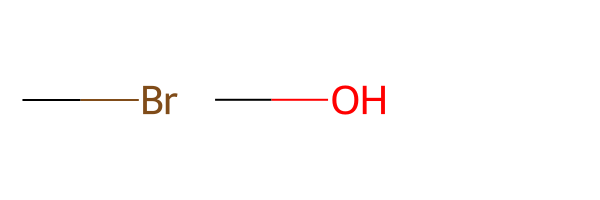

PREDICTED


[08:54:56] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 5 


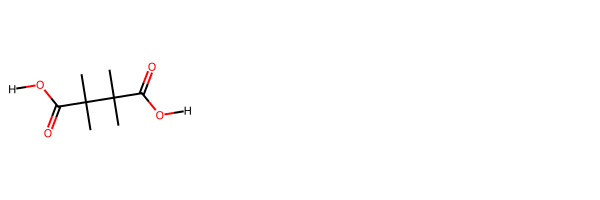

AbiHyd: Nucleophilic Substitution (no adjacent X)
EXAMPLE


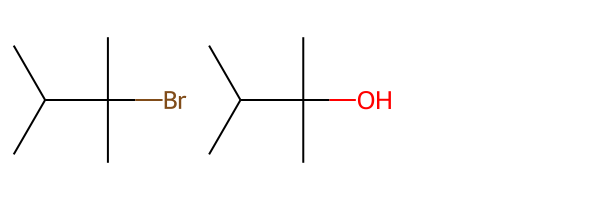

PREDICTED


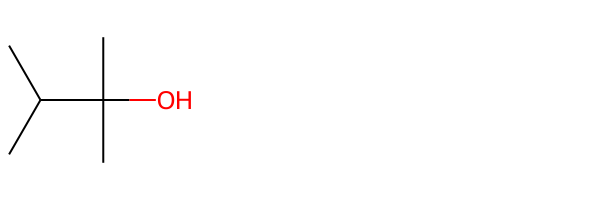

AbiHyd: Nucleophilic Substitution (no adjacent X)
EXAMPLE


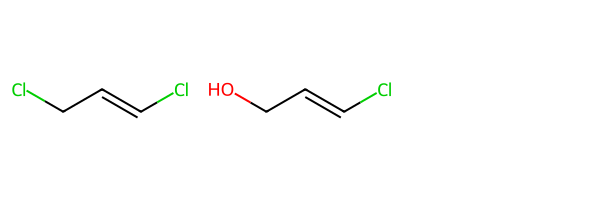

PREDICTED


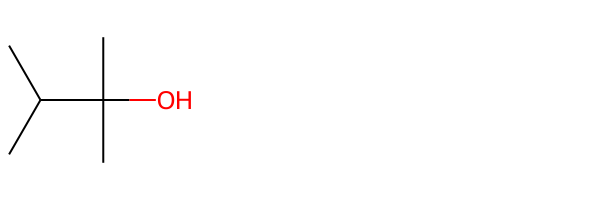

AbiHyd: Nucleophilic Substitution (no adjacent X)
EXAMPLE


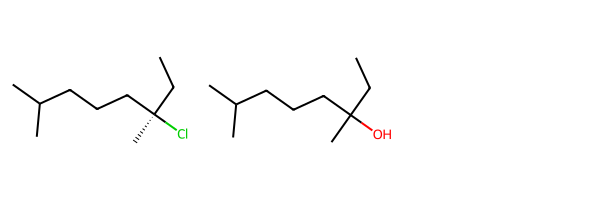

PREDICTED


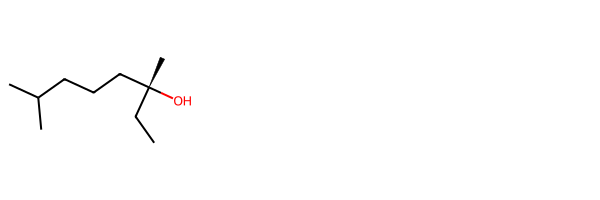

AbiHyd: Nucleophilic Substitution (no adjacent X)
EXAMPLE


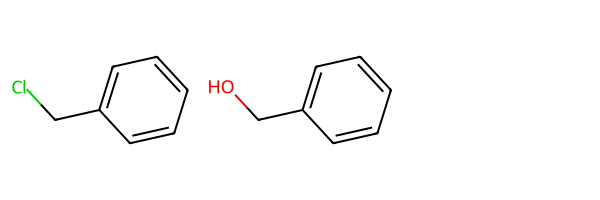

PREDICTED


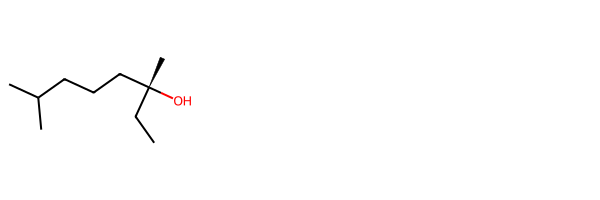

AbiHyd: Amide Hydrolysis
EXAMPLE


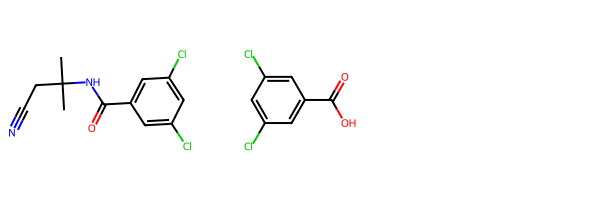

PREDICTED


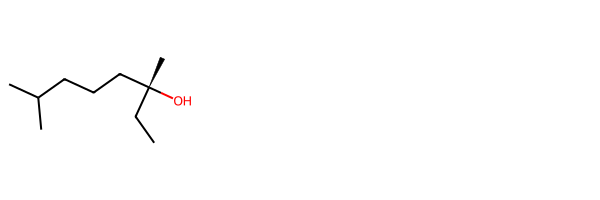

AbiHyd: Amide Hydrolysis
EXAMPLE


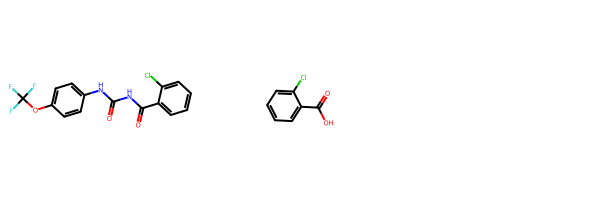

PREDICTED


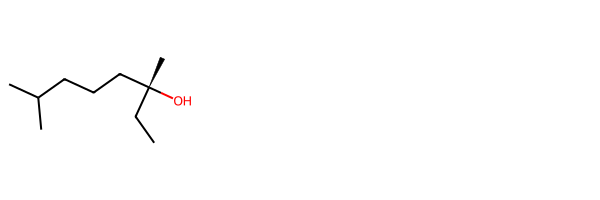

AbiHyd: Amide Hydrolysis
EXAMPLE


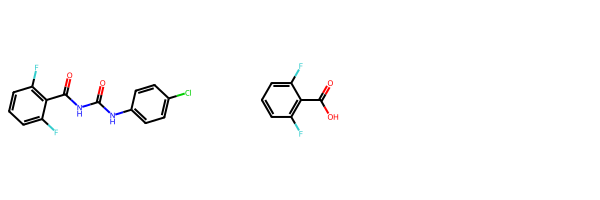

PREDICTED


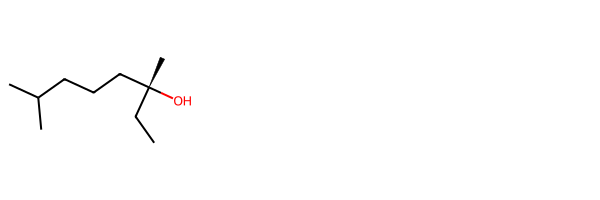

AbiHyd: Amide Hydrolysis
EXAMPLE


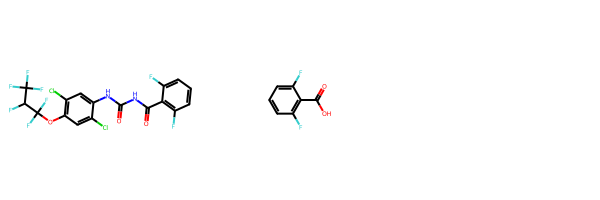

PREDICTED


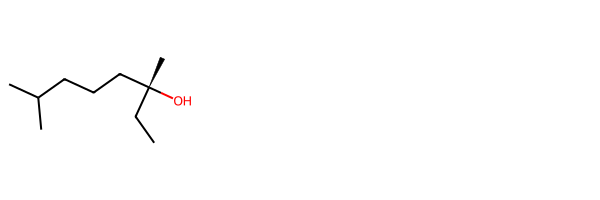

AbiHyd: Amide Hydrolysis
EXAMPLE


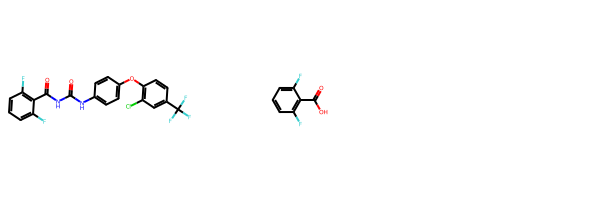

PREDICTED


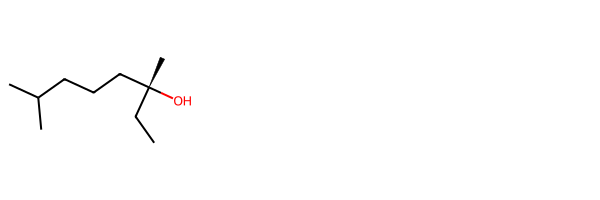

AbiHyd: Amide Hydrolysis
EXAMPLE


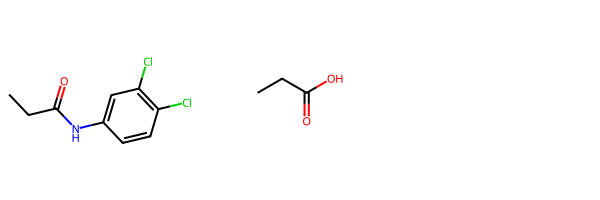

PREDICTED


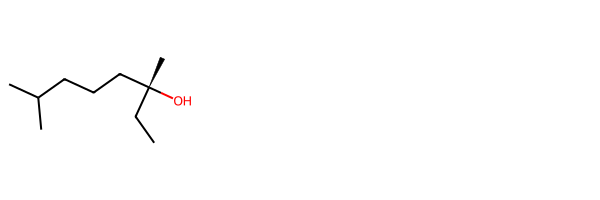

AbiHyd: Carbamate Hydrolysis
EXAMPLE


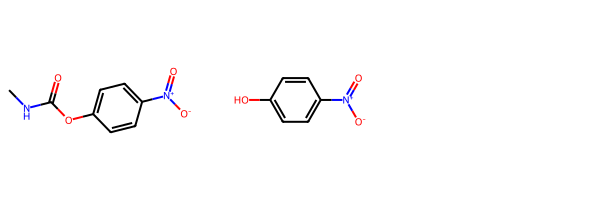

PREDICTED


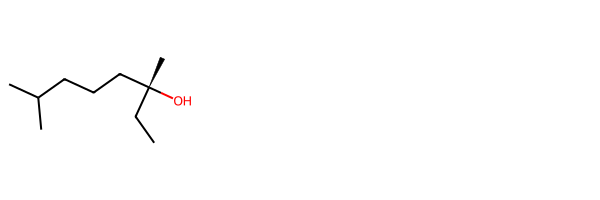

AbiHyd: Carbamate Hydrolysis
EXAMPLE


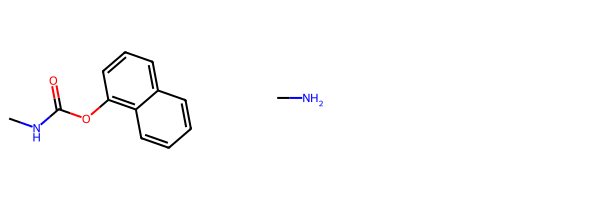

PREDICTED


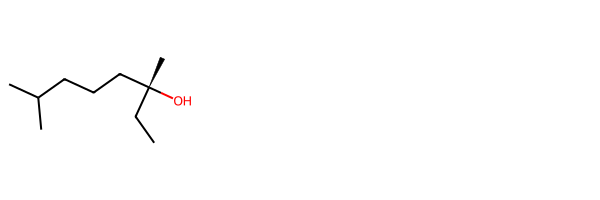

AbiHyd: Carbamate Hydrolysis
EXAMPLE


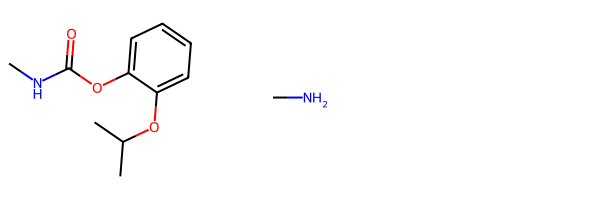

PREDICTED


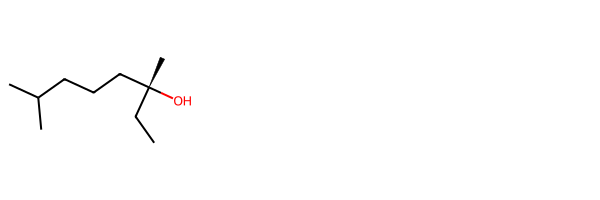

AbiHyd: Carbamate Hydrolysis
EXAMPLE


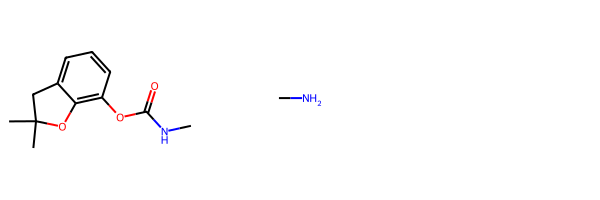

PREDICTED


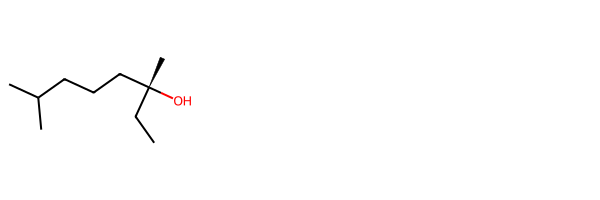

AbiHyd: Carbamate Hydrolysis
EXAMPLE


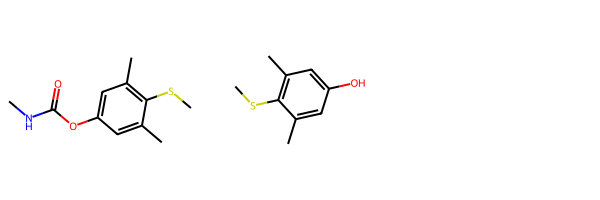

PREDICTED


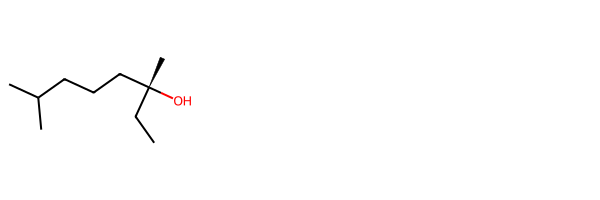

AbiHyd: Urea Hydrolysis
EXAMPLE


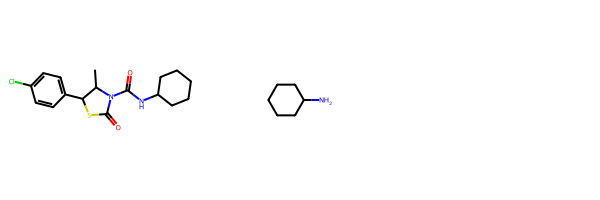

PREDICTED


[08:54:56] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 7 


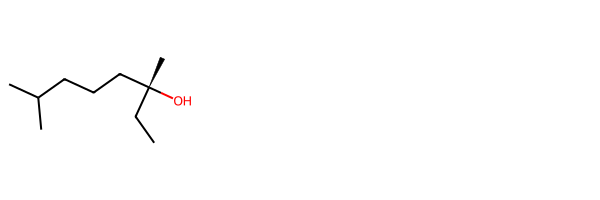

AbiHyd: Urea Hydrolysis
EXAMPLE


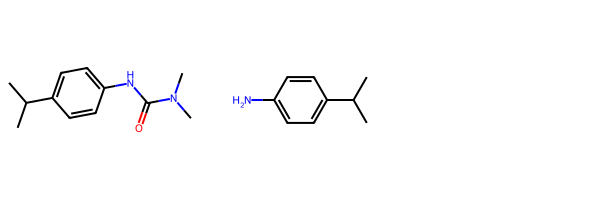

PREDICTED


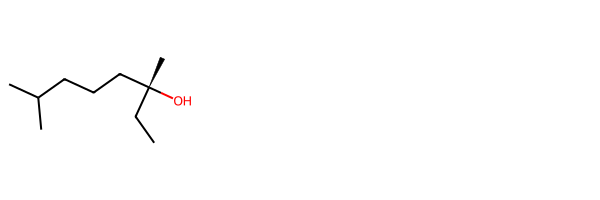

AbiHyd: Urea Hydrolysis
EXAMPLE


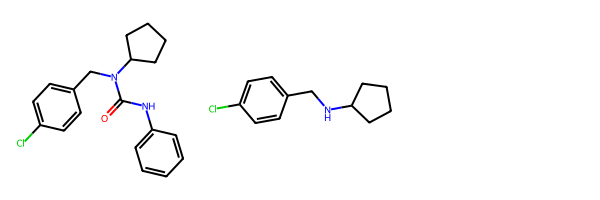

PREDICTED


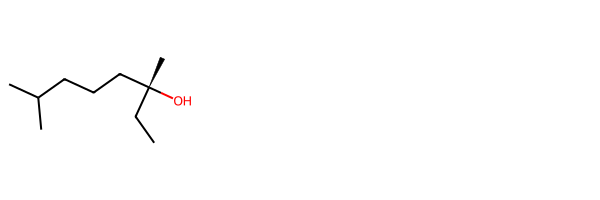

AbiHyd: Sulfonylurea Hydrolysis
EXAMPLE


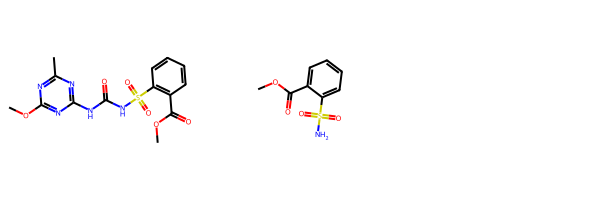

PREDICTED


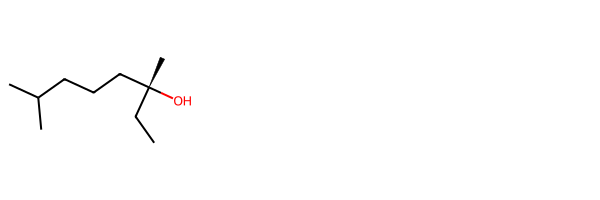

AbiHyd: Sulfonylurea Hydrolysis
EXAMPLE


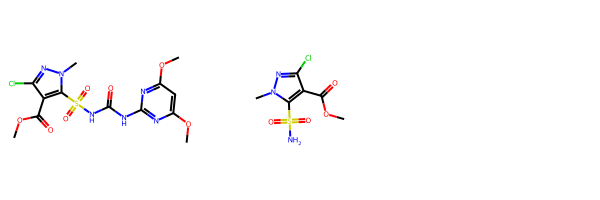

PREDICTED


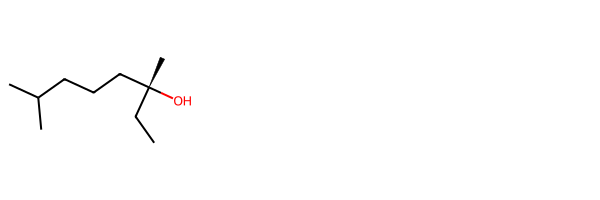

AbiHyd: Sulfonylurea Hydrolysis
EXAMPLE


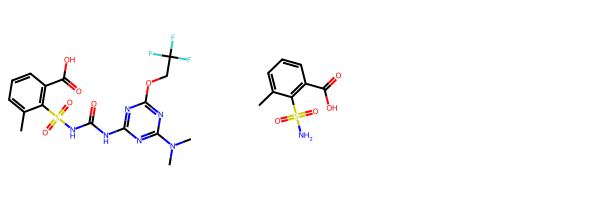

PREDICTED


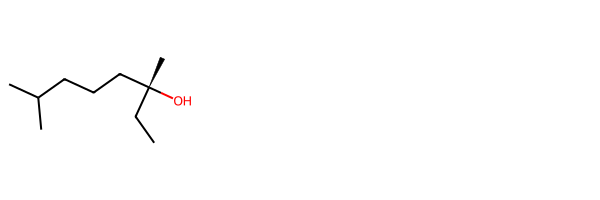

AbiHyd: Sulfonylurea Hydrolysis
EXAMPLE


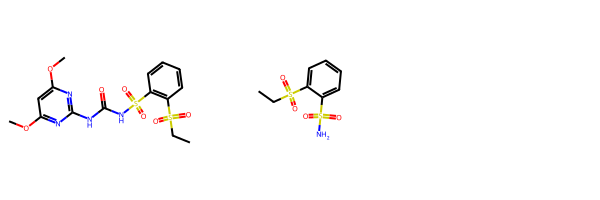

PREDICTED


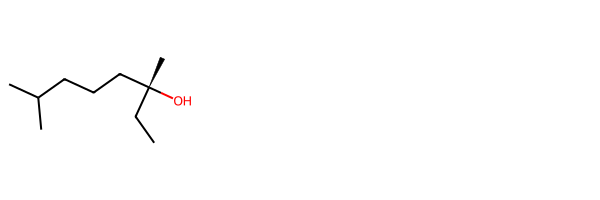

AbiHyd: Carbonate Hydrolysis
EXAMPLE


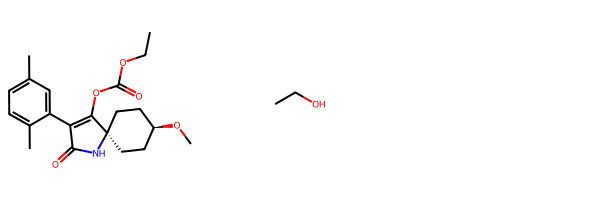

PREDICTED


[08:54:57] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 5 


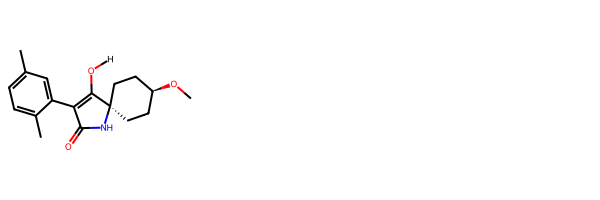

AbiHyd: Thiocarbamate Hydrolysis
EXAMPLE


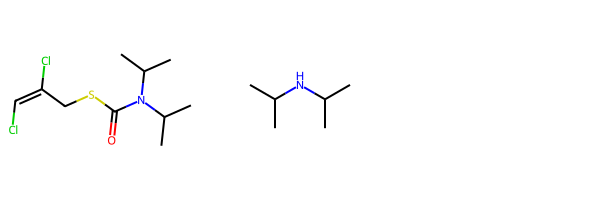

PREDICTED


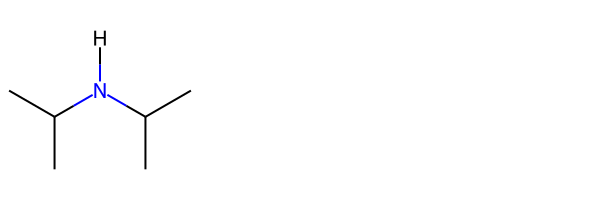

AbiHyd: Nitrile Hydrolysis
EXAMPLE


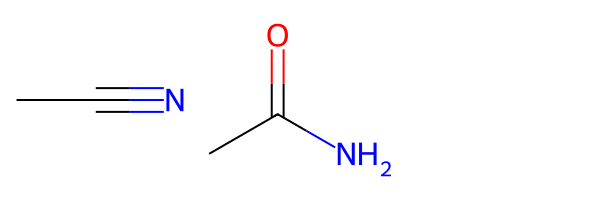

PREDICTED


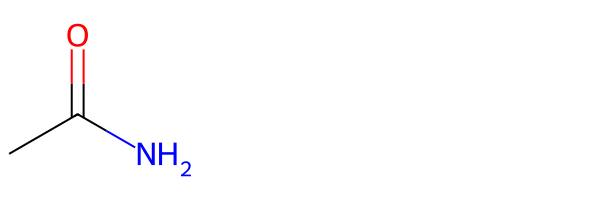

AbiHyd: Nitrile Hydrolysis
EXAMPLE


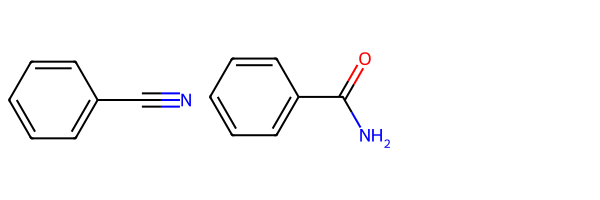

PREDICTED


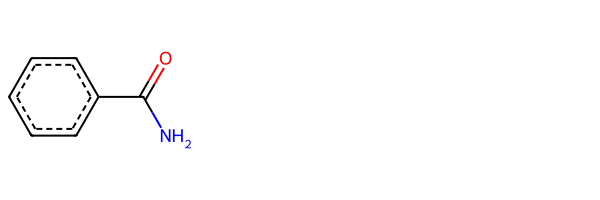

AbiHyd: Nitrile Hydrolysis
EXAMPLE


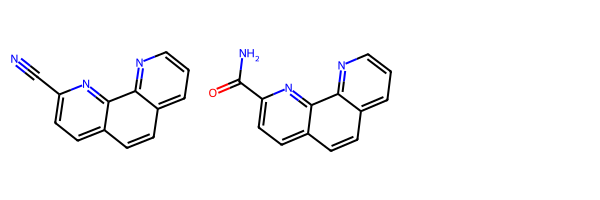

PREDICTED


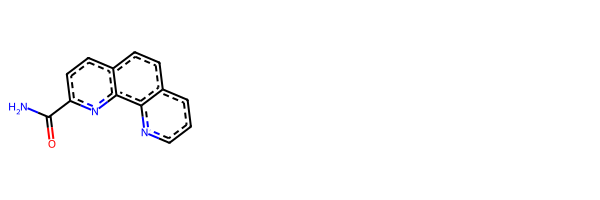

AbiHyd: Nitrile Hydrolysis
EXAMPLE


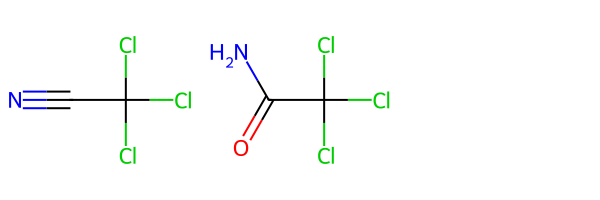

PREDICTED


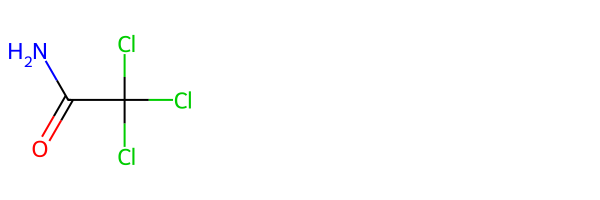

AbiHyd: Nitrile Hydrolysis
EXAMPLE


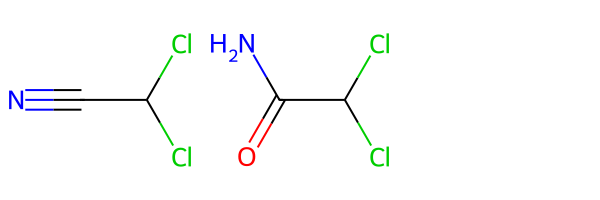

PREDICTED


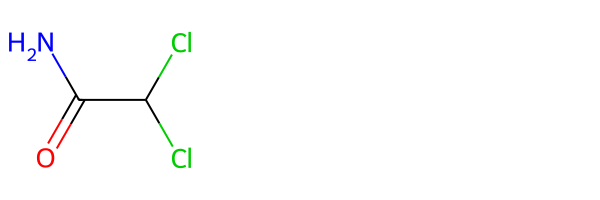

AbiHyd: Lactone Alkaline Hydrolysis
EXAMPLE


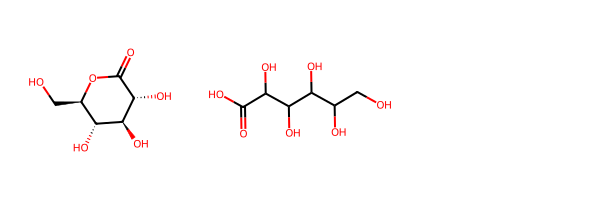

PREDICTED


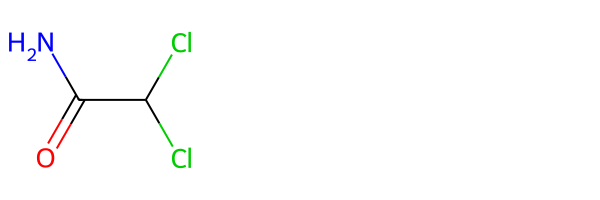

AbiHyd: Lactone Alkaline Hydrolysis
EXAMPLE


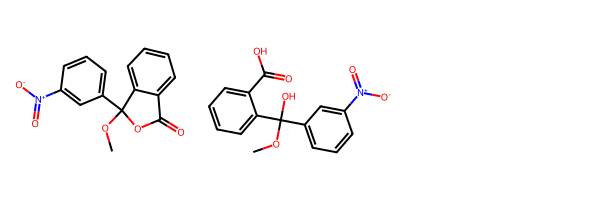

PREDICTED


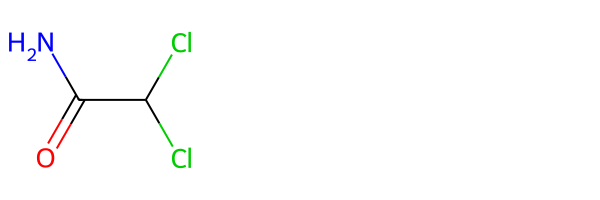

AbiHyd: Lactone Alkaline Hydrolysis
EXAMPLE


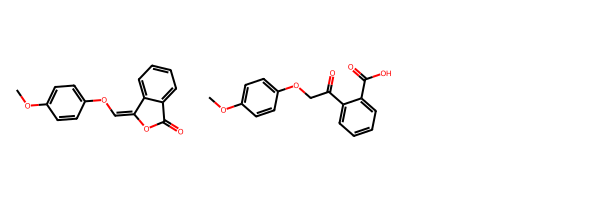

PREDICTED


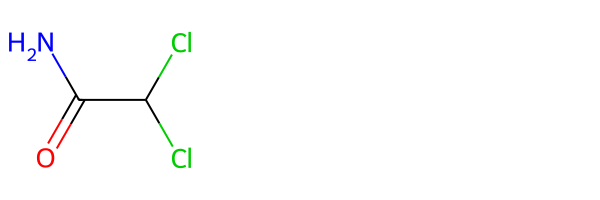

AbiHyd: Lactone Alkaline Hydrolysis
EXAMPLE


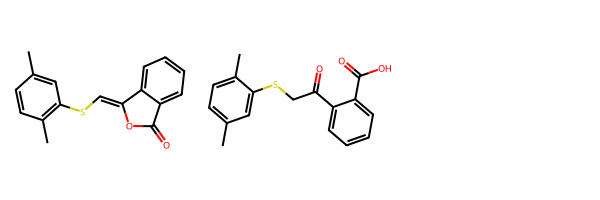

PREDICTED


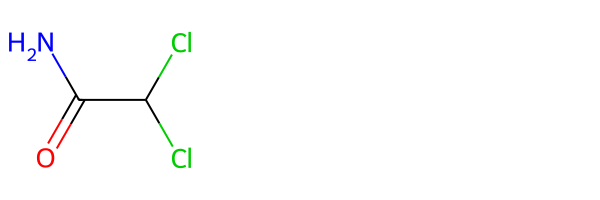

AbiHyd: Lactam Hydrolysis
EXAMPLE


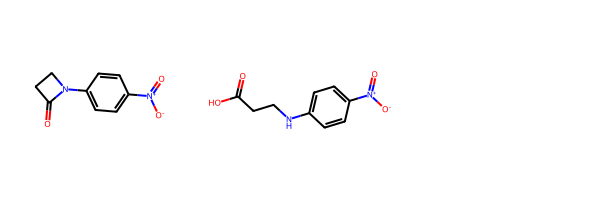

PREDICTED


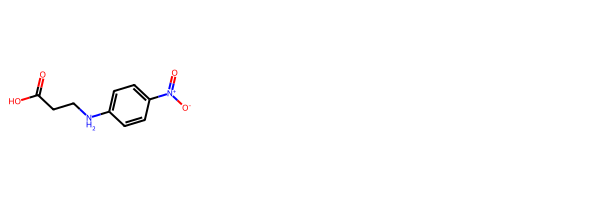

AbiHyd: Lactam Hydrolysis
EXAMPLE


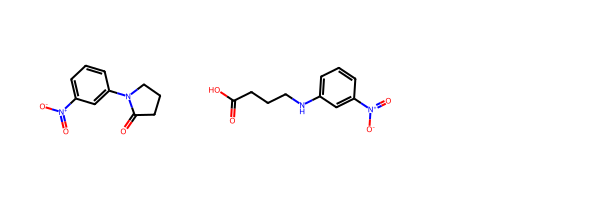

PREDICTED


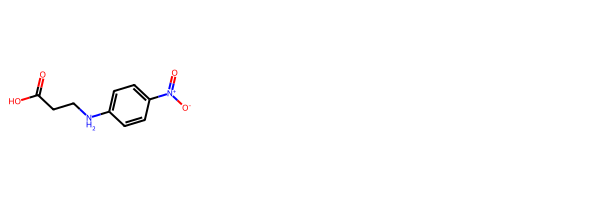

AbiHyd: Lactam Hydrolysis
EXAMPLE


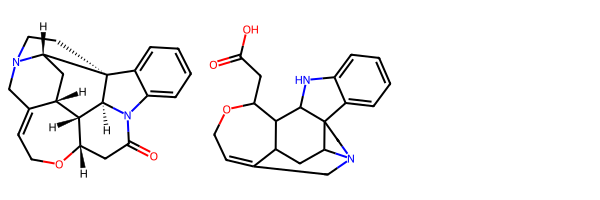

PREDICTED


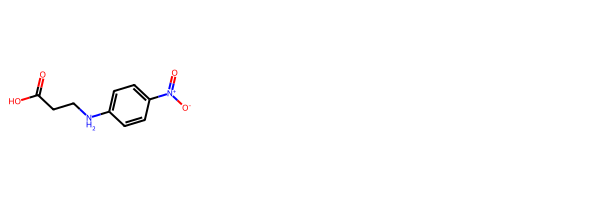

AbiHyd: N-S Cleavage
EXAMPLE


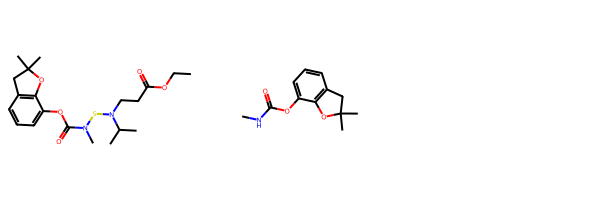

PREDICTED


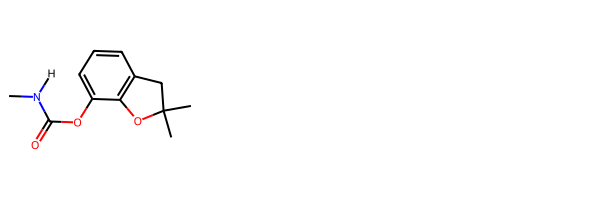

AbiHyd: N-S Cleavage
EXAMPLE


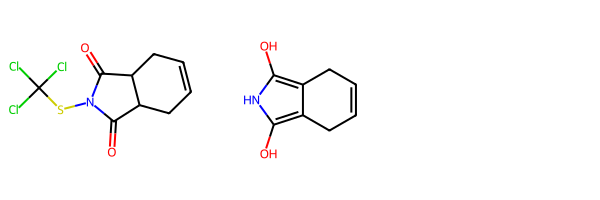

PREDICTED


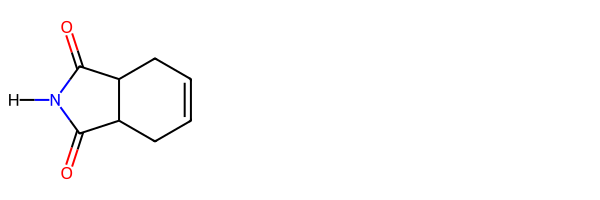

AbiHyd: N-S Cleavage
EXAMPLE


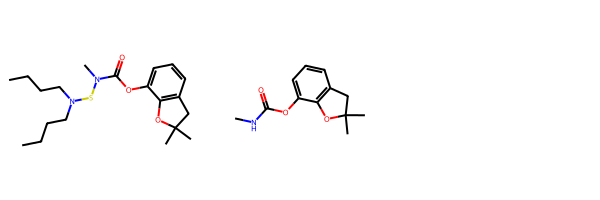

PREDICTED


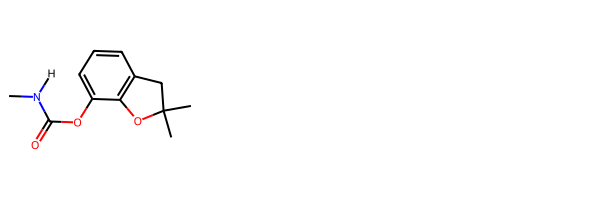

AbiHyd: N-S Cleavage
EXAMPLE


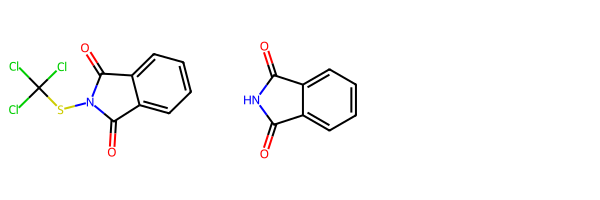

PREDICTED


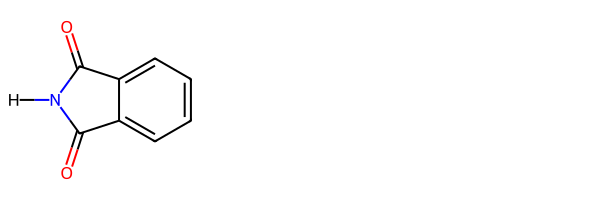

AbiHyd: N-S Cleavage
EXAMPLE


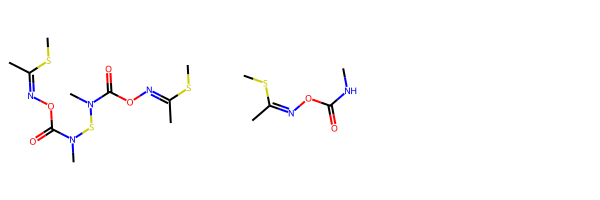

PREDICTED


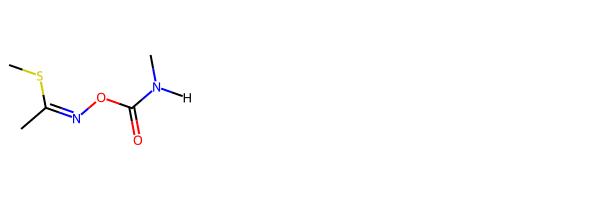

AbiHyd: Nucleophilic Substitution (vicinal X)
EXAMPLE


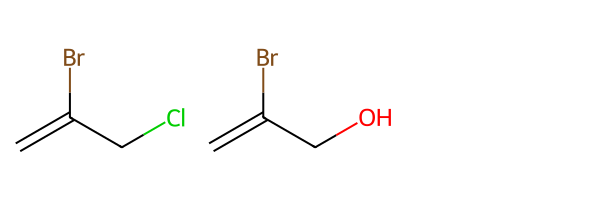

PREDICTED


[08:54:58] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 4 


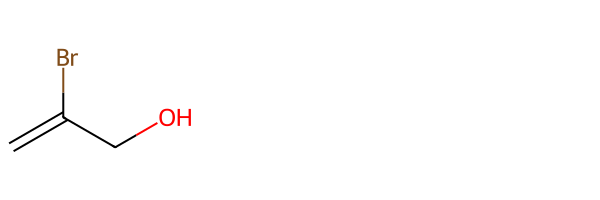

AbiHyd: Imide Hydrolysis
EXAMPLE


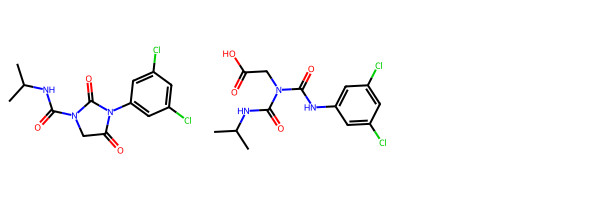

PREDICTED


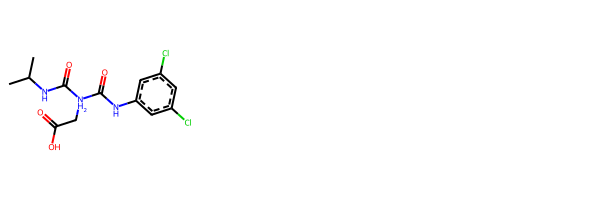

AbiHyd: Imide Hydrolysis
EXAMPLE


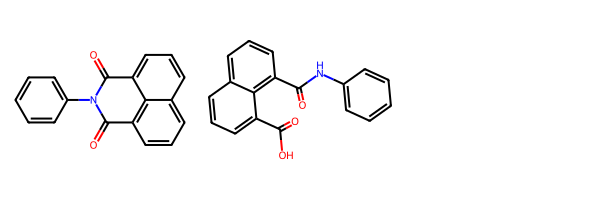

PREDICTED


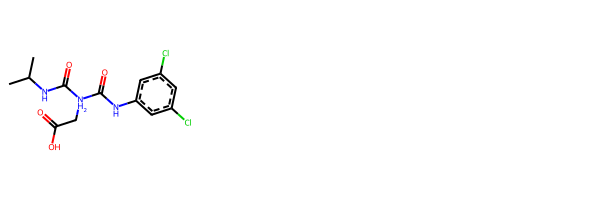

AbiHyd: Imide Hydrolysis
EXAMPLE


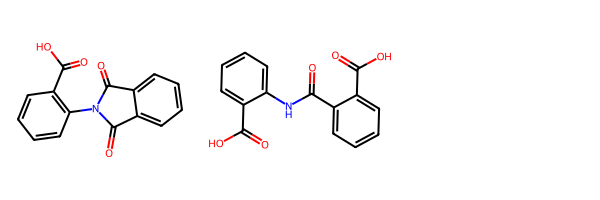

PREDICTED


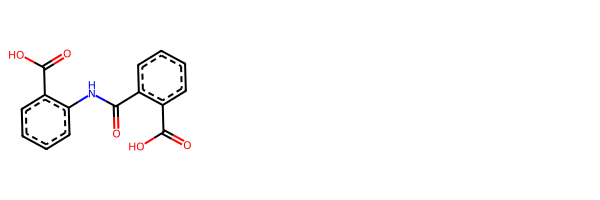

AbiHyd: Imide Hydrolysis
EXAMPLE


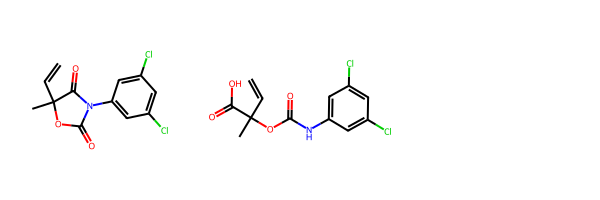

PREDICTED


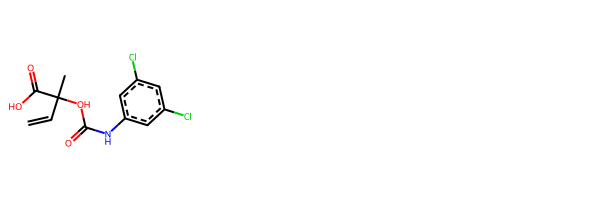

AbiHyd: Cyclic Anhydride Hydrolysis
EXAMPLE


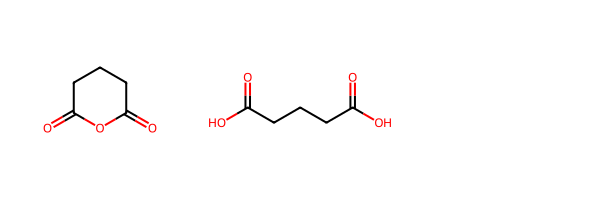

PREDICTED


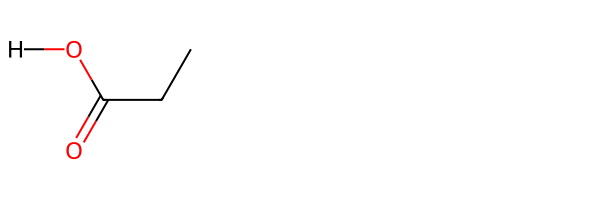

AbiHyd: Cyclic Anhydride Hydrolysis
EXAMPLE


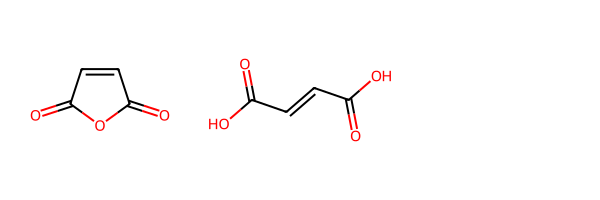

PREDICTED


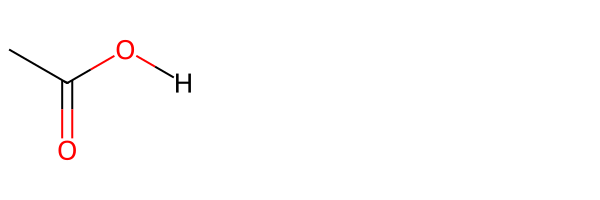

AbiHyd: Cyclic Anhydride Hydrolysis
EXAMPLE


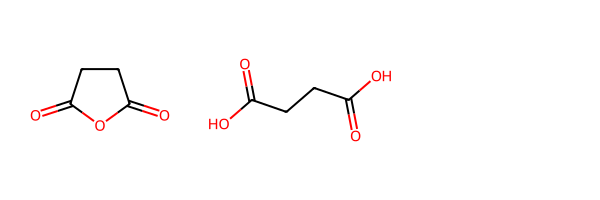

PREDICTED


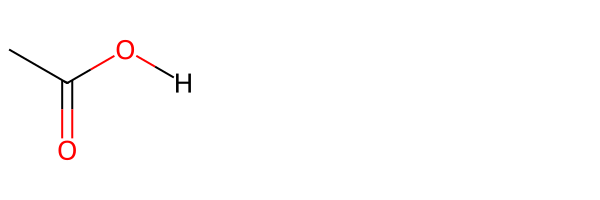

AbiHyd: Cyclic Anhydride Hydrolysis
EXAMPLE


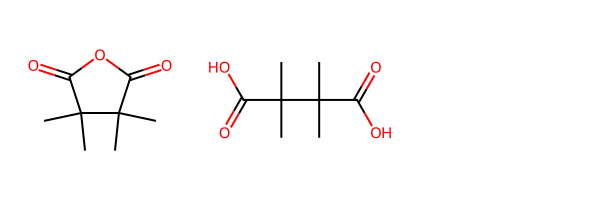

PREDICTED


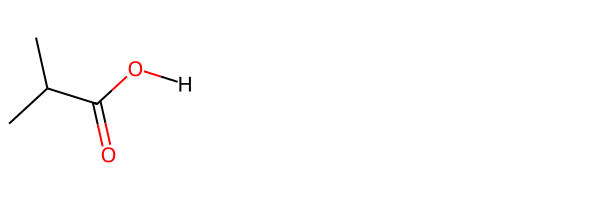

AbiHyd: Acid Halide Hydrolysis
EXAMPLE


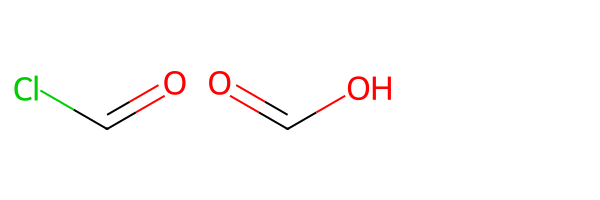

PREDICTED


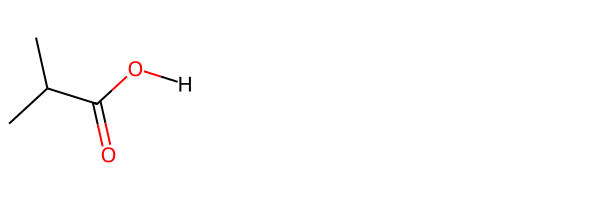

AbiHyd: Acid Halide Hydrolysis
EXAMPLE


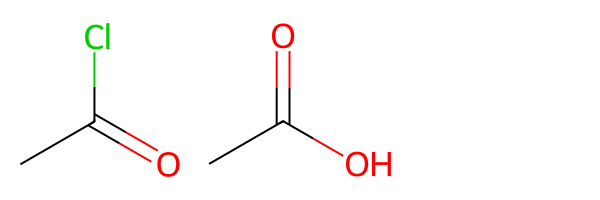

PREDICTED


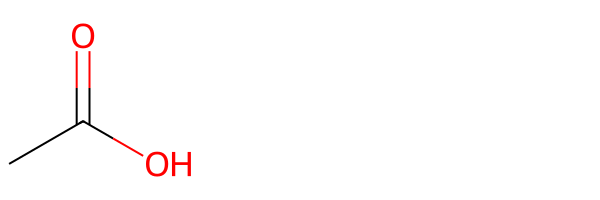

AbiHyd: Acid Halide Hydrolysis
EXAMPLE


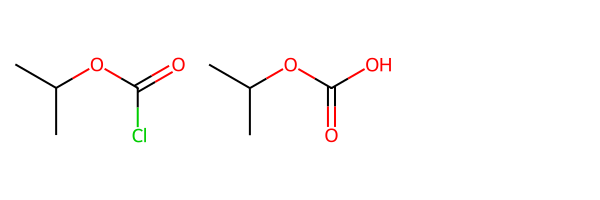

PREDICTED


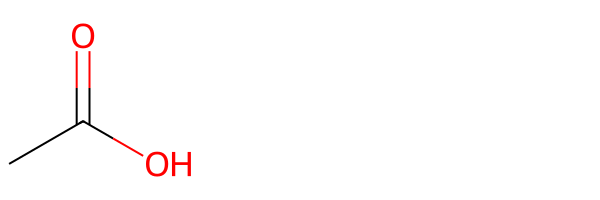

AbiHyd: Acid Halide Hydrolysis
EXAMPLE


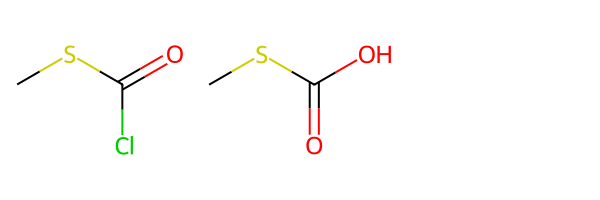

PREDICTED


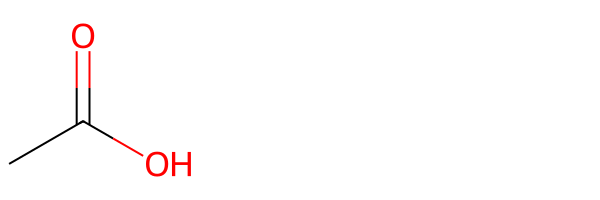

AbiHyd: Nucleophilic Substitution (geminal X)
EXAMPLE


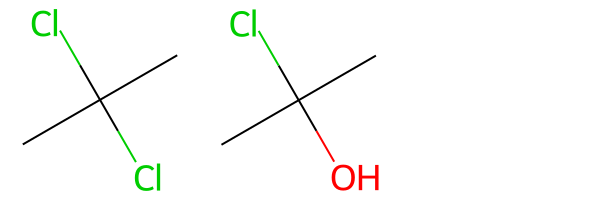

PREDICTED


[08:54:58] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 5 


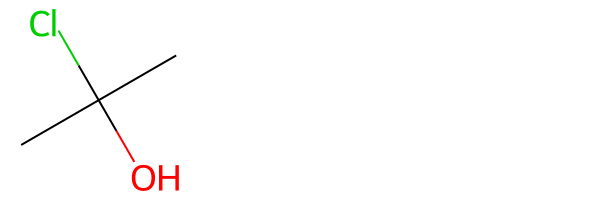

AbiHyd: Nucleophilic Substitution (geminal X)
EXAMPLE


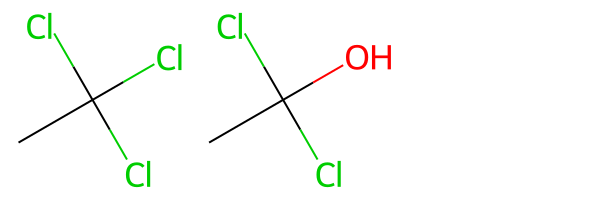

PREDICTED


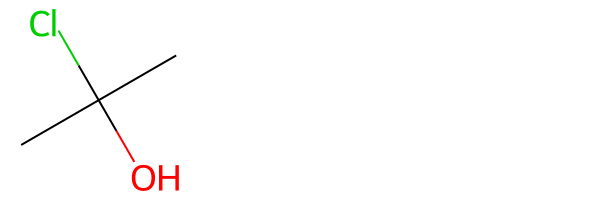

AbiHyd: Elimination
EXAMPLE


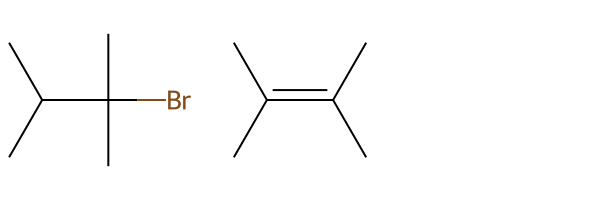

PREDICTED


[08:54:59] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 3 


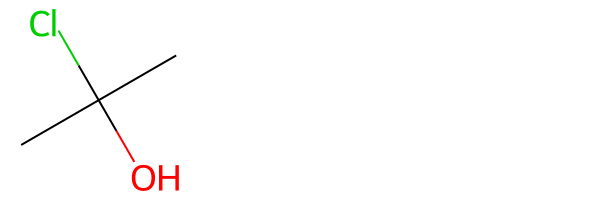

AbiHyd: Elimination
EXAMPLE


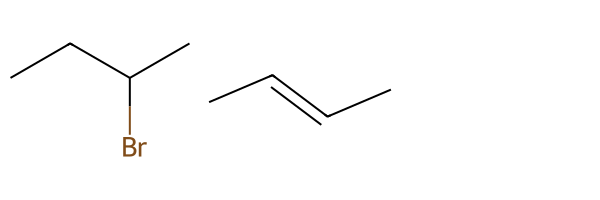

PREDICTED


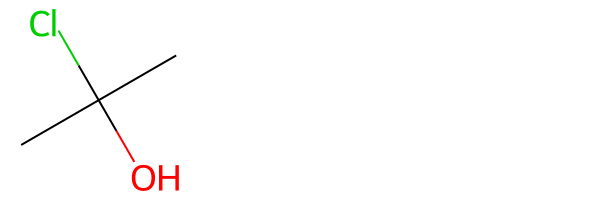

AbiHyd: Elimination
EXAMPLE


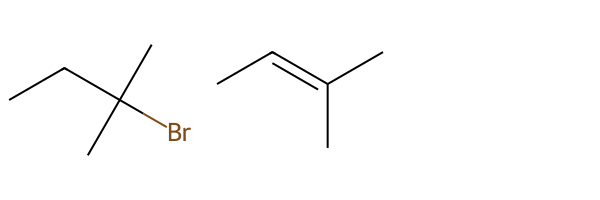

PREDICTED


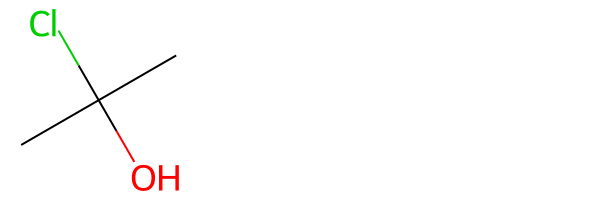

AbiHyd: Elimination
EXAMPLE


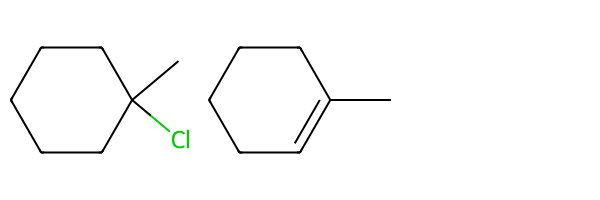

PREDICTED


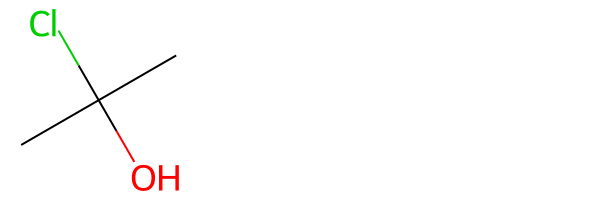

AbiHyd: Elimination
EXAMPLE


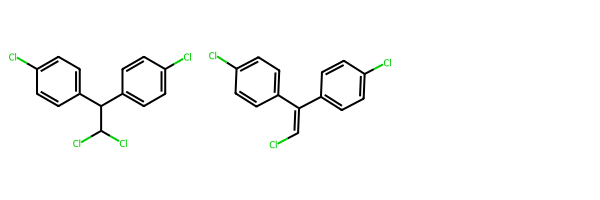

PREDICTED


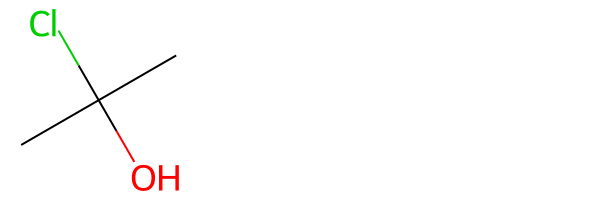

AbiHyd: Elimination
EXAMPLE


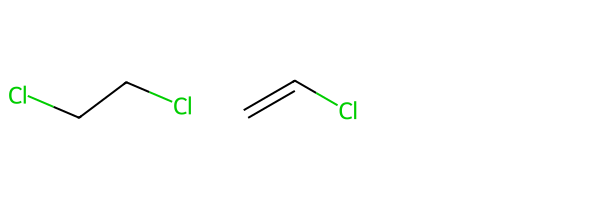

PREDICTED


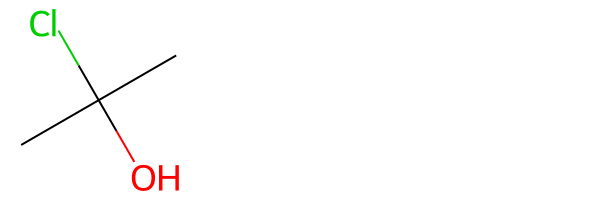

AbiHyd: Elimination
EXAMPLE


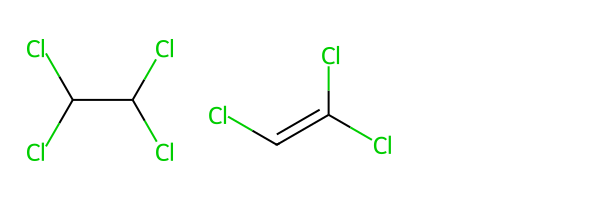

PREDICTED


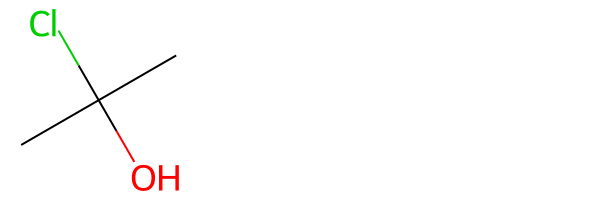

AbiHyd: Elimination
EXAMPLE


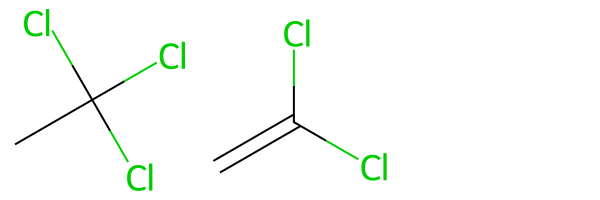

PREDICTED


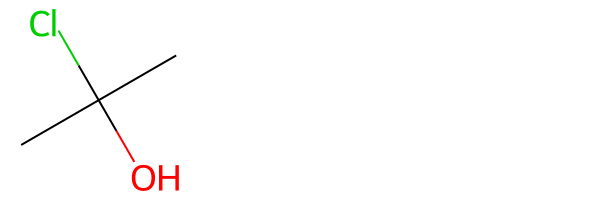

AbiHyd: Elimination
EXAMPLE


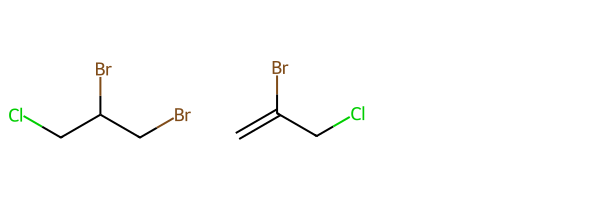

PREDICTED


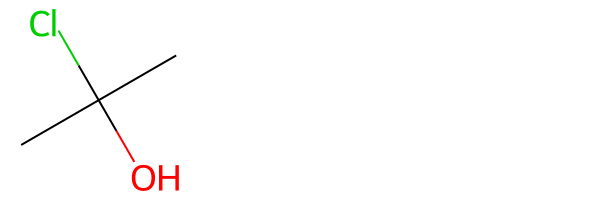

AbiHyd: Epoxide Hydrolysis
EXAMPLE


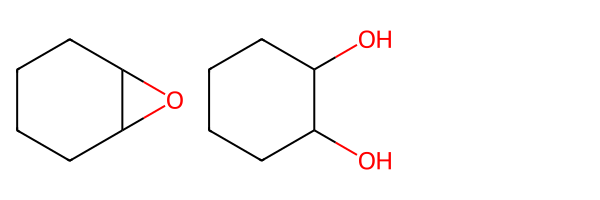

PREDICTED


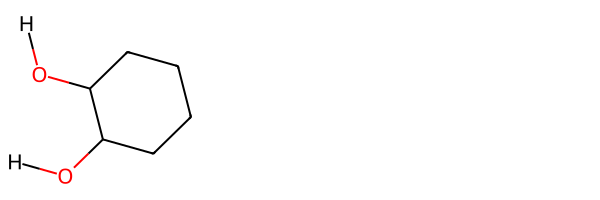

AbiHyd: Epoxide Hydrolysis
EXAMPLE


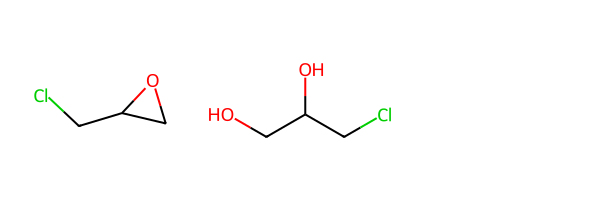

PREDICTED


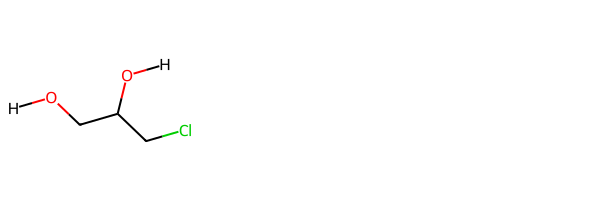

AbiHyd: Epoxide Hydrolysis
EXAMPLE


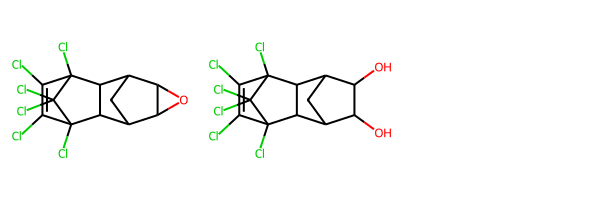

PREDICTED


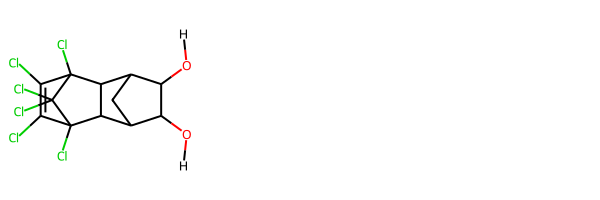

AbiHyd: Epoxide Hydrolysis
EXAMPLE


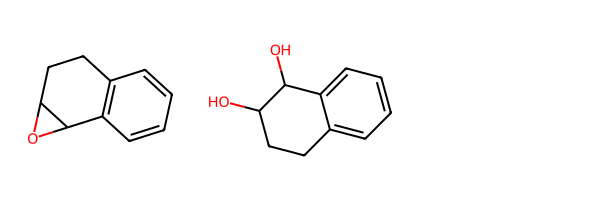

PREDICTED


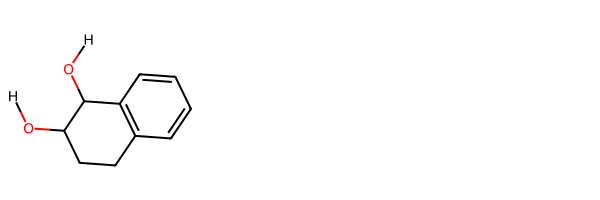

AbiHyd: Organophosphorus Ester Hydrolysis 1
EXAMPLE


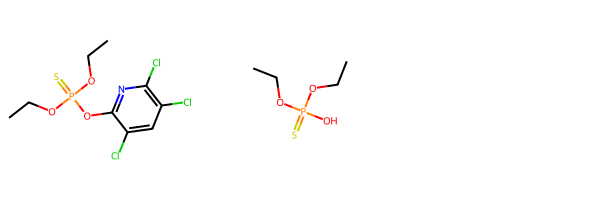

PREDICTED


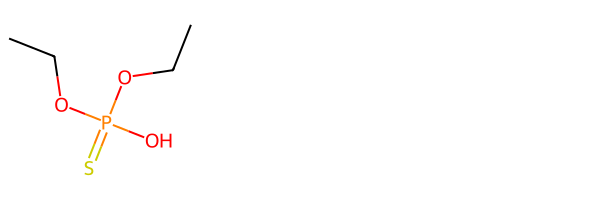

AbiHyd: Organophosphorus Ester Hydrolysis 1
EXAMPLE


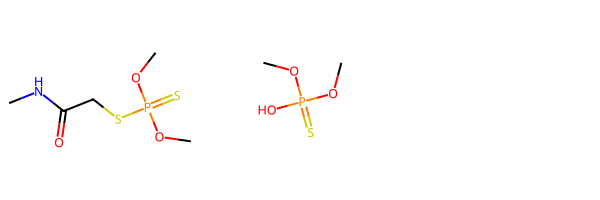

PREDICTED


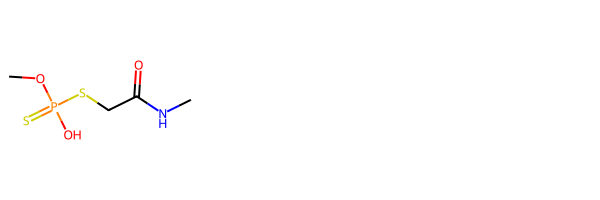

AbiHyd: Organophosphorus Ester Hydrolysis 1
EXAMPLE


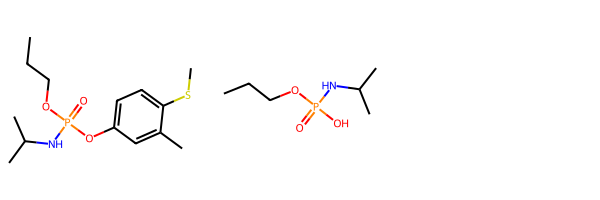

PREDICTED


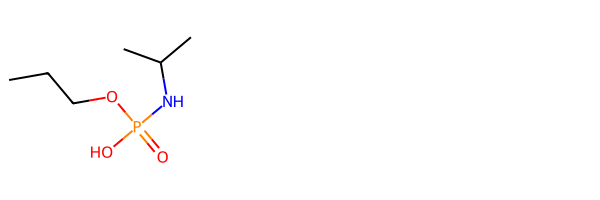

AbiHyd: Organophosphorus Ester Hydrolysis 1
EXAMPLE


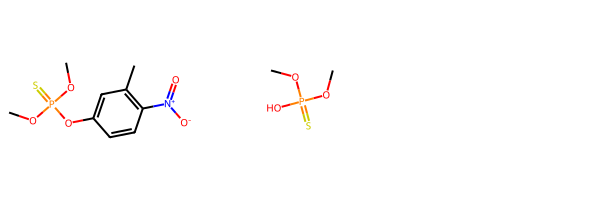

PREDICTED


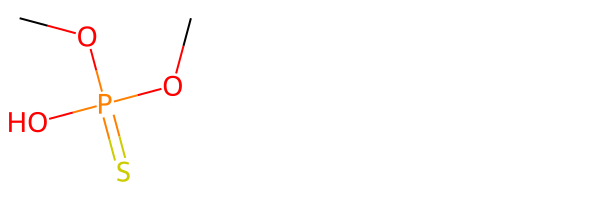

AbiHyd: Organophosphorus Ester Hydrolysis 2
EXAMPLE


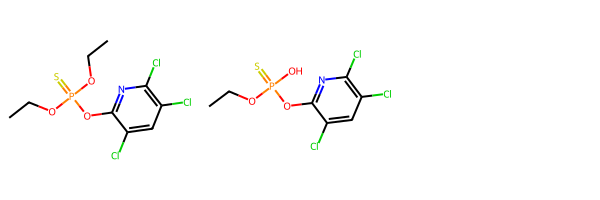

PREDICTED


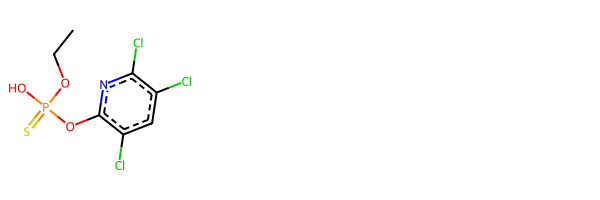

AbiHyd: Organophosphorus Ester Hydrolysis 2
EXAMPLE


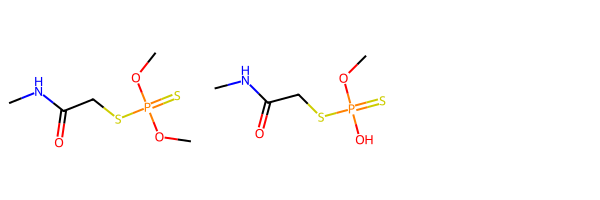

PREDICTED


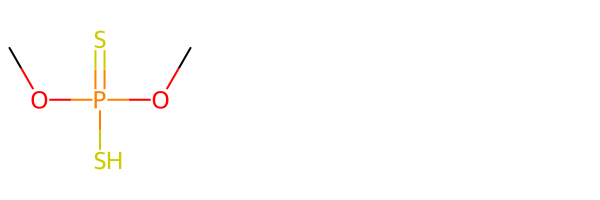

AbiHyd: Organophosphorus Ester Hydrolysis 2
EXAMPLE


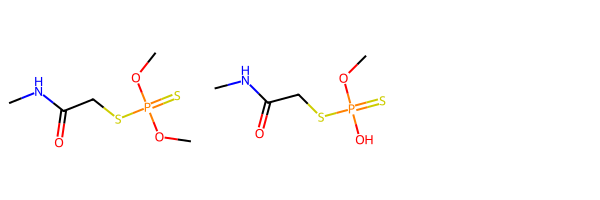

PREDICTED


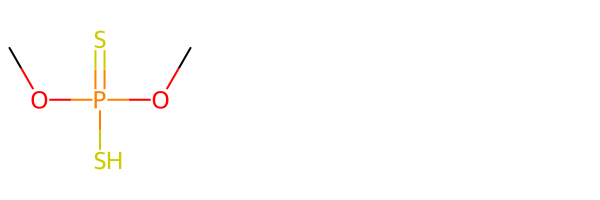

AbiHyd: Carboxylic Acid Ester Hydrolysis
EXAMPLE


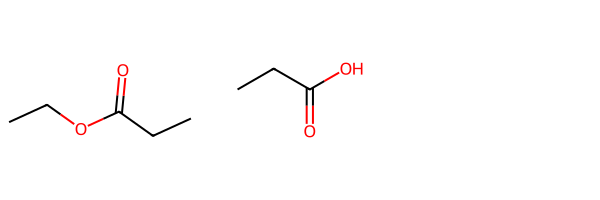

PREDICTED


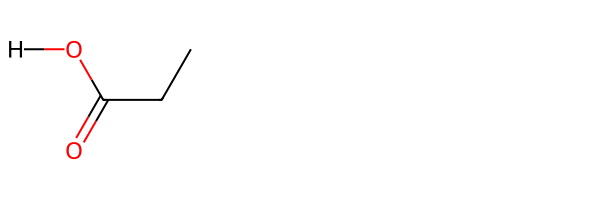

AbiHyd: Carboxylic Acid Ester Hydrolysis
EXAMPLE


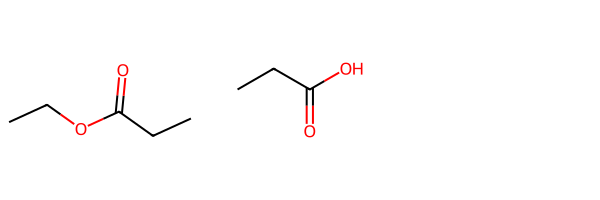

PREDICTED


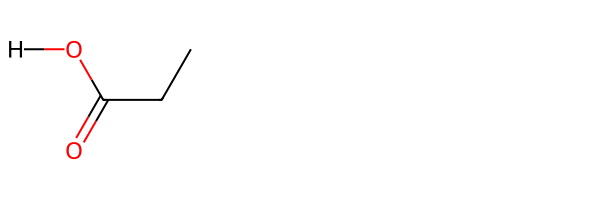

AbiHyd: Carboxylic Acid Ester Hydrolysis
EXAMPLE


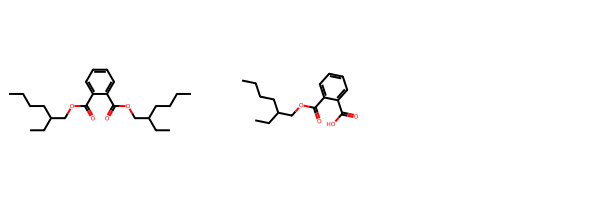

PREDICTED


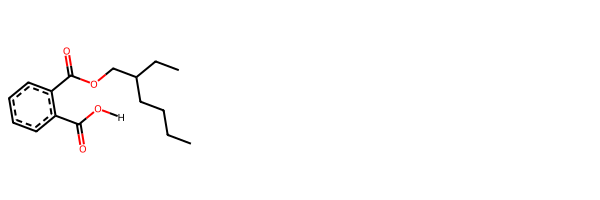

AbiHyd: Carboxylic Acid Ester Hydrolysis
EXAMPLE


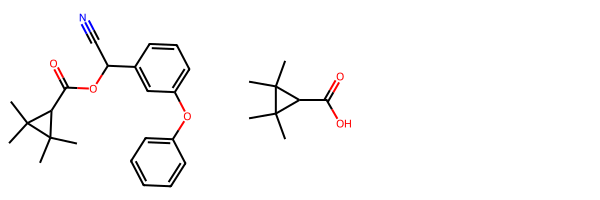

PREDICTED


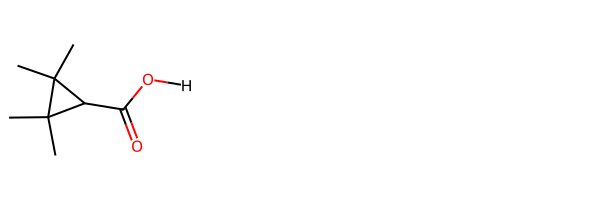

AbiHyd: Carboxylic Acid Ester Hydrolysis
EXAMPLE


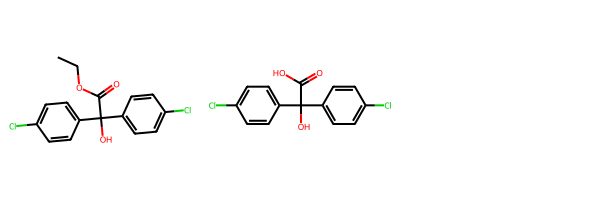

PREDICTED


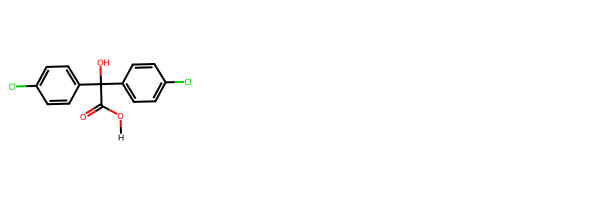

AbiHyd: Carboxylic Acid Ester Hydrolysis
EXAMPLE


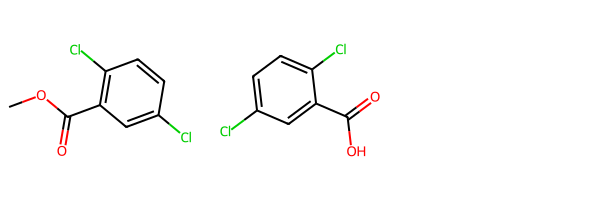

PREDICTED


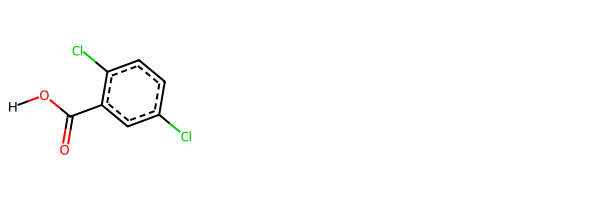

AbiHyd: Carboxylic Acid Ester Hydrolysis
EXAMPLE


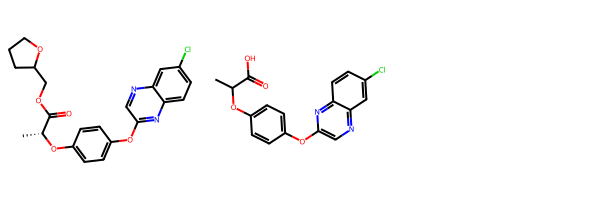

PREDICTED


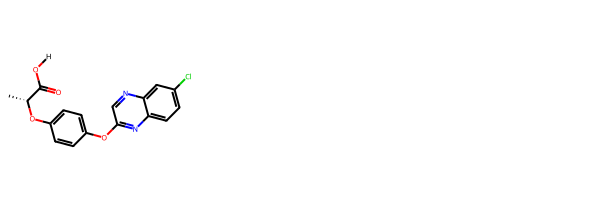

AbiHyd: Carboxylic Acid Ester Hydrolysis
EXAMPLE


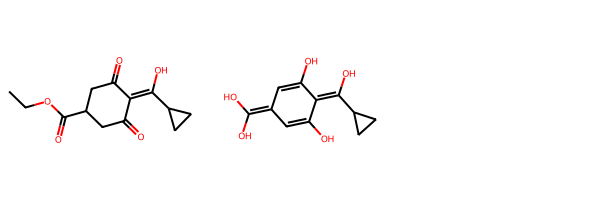

PREDICTED


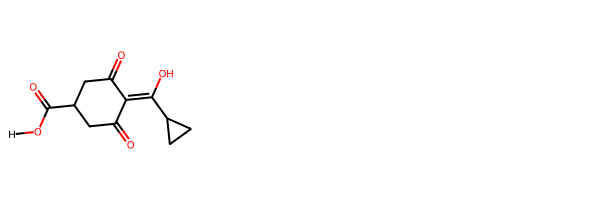

AbiHyd: Anhydride Hydrolysis
EXAMPLE


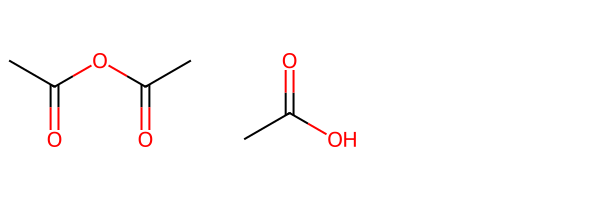

PREDICTED


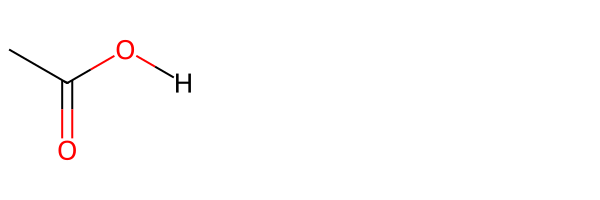

AbiHyd: Anhydride Hydrolysis
EXAMPLE


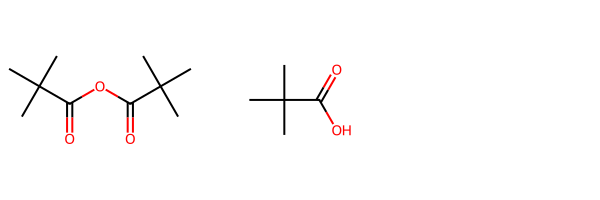

PREDICTED


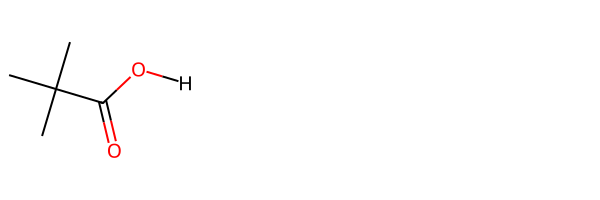

In [14]:
for file in os.listdir(path):
    #extract rxn number from file
    x=file.split('wSpRxn')[1]
    id=int(x.split('.rxn')[0])
    
    rxn=AllChem.ReactionFromRxnFile(file)
#    display(Draw.ReactionToImage(rxn))
    noNaEx=ex[ex['Parent'].isna()==False]
    
    pred=[]
    match=[]
    for x in noNaEx[ex['ID']==id].index:
        par=noNaEx['Parent'][x]
        prod=noNaEx['std_Product1'][x]
        scheme=noNaEx['Scheme'][x]
        #print(par,prod)
        parent=Chem.MolFromSmiles(par)
        product=Chem.MolFromSmiles(prod)
        print(scheme)
        print('EXAMPLE')
        display(Draw.MolsToGridImage([parent,product]))
     
    #chemical transformation
        ps=rxn.RunReactants((parent,))

    #loop through products, remove any duplicates due to symmetrical reaction center
        for i in range(len(ps)):
            current_mol=ps[i][0]
            smi=Chem.MolToSmiles(current_mol)
            final=RemoveSymDups(smi,current_mol)
            #pSmi=CanonicalizeMol(final[0])
            #pred.append(pSmi)

            #if prod != 'NA' or prod != pSmi:
                #answer='Did Not Match'
            #else:
               # answer='Match'
            #match.append(answer)
        #rint(len(pred))
        # noNaEx['std_predProduct1']=pred
        # noNaEx['Match?']=match
    #print structure
        print('PREDICTED')
        display(Chem.Draw.MolsToGridImage(final))


## Make a results table

In [25]:
#make an empty dataframe to hold results
results=pd.DataFrame()

#Get list of parents to help with model resolution
results[['ID','Scheme','Parent','Product1','std_Product1']]=noNaEx[['ID','Scheme','Parent','Product1','std_Product1']]

#remove any duplicates
results.drop_duplicates('Parent',inplace=True, ignore_index=True)
results.insert(5,'pred_std_Product1','')
results

,ID,Scheme,Parent,Product1,std_Product1,pred_std_Product1
0,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CBr,CO,CO,
1,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CC(C)C(C)(C)Br,CC(C)C(C)(C)O,CC(C)C(C)(C)O,
2,1,AbiHyd: Nucleophilic Substitution (no adjacent X),ClCC=CCl,OCC=CCl,OCC=CCl,
3,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CC[C@@](C)(Cl)CCCC(C)C,CC[C@@](C)(O)CCCC(C)C,CCC(C)(O)CCCC(C)C,
4,1,AbiHyd: Nucleophilic Substitution (no adjacent X),ClCC1=CC=CC=C1,OCC1=CC=CC=C1,OCc1ccccc1,
...,...,...,...,...,...,...
76,21,AbiHyd: Cyclic Anhydride Hydrolysis,CC1(C)C(=O)OC(=O)C1(C)C,CC(C)(C(O)=O)C(C)(C)C(O)=O,CC(C)(C(=O)O)C(C)(C)C(=O)O,
77,24,AbiHyd: Acid Halide Hydrolysis,ClC=O,OC=O,O=CO,
78,24,AbiHyd: Acid Halide Hydrolysis,CC(Cl)=O,CC(O)=O,CC(=O)O,
79,24,AbiHyd: Acid Halide Hydrolysis,CC(C)OC(Cl)=O,CC(C)OC(O)=O,CC(C)OC(=O)O,


### Run all examples with appropriate rxn
### save all predicted products to dataframe

In [26]:
for file in os.listdir(path):
    #extract rxn number from file
    x=file.split('wSpRxn')[1]
    id=int(x.split('.rxn')[0])

    rxn=AllChem.ReactionFromRxnFile(file)

    for x in results[results['ID']==id].index:
        par=results['Parent'][x]
        prod=results['std_Product1'][x]
        scheme=results['Scheme'][x]
        parent=Chem.MolFromSmiles(par)
        product=Chem.MolFromSmiles(prod)
         
        #chemical transformation
        ps=rxn.RunReactants((parent,))
        if len(ps)==0:
            results['pred_std_Product1'][x]='NA'
        else:
            for i in range(len(ps)):
                current_mol=ps[i][0]
                #smi=Chem.MolToSmiles(current_mol)
                noH_mol=Chem.RemoveAllHs(current_mol)
                smi=Chem.MolToSmiles(noH_mol)
                final=RemoveSymDups(smi,noH_mol)
                pSmi=CanonicalizeMol(final[0])  
            results['pred_std_Product1'][x]=pSmi
results

[09:15:14] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 5 
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 7 
[09:15:14] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 5 
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:14] Running Uncharger
[09:15:15] Running Uncharger
[09:15:15] Running Uncharger
[09:15:15] Running Uncharger
[09:15:15] Running Uncharger
[09:15:15] Running Uncharger
[09:15:15] Running Uncharger
[

,ID,Scheme,Parent,Product1,std_Product1,pred_std_Product1
0,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CBr,CO,CO,NA
1,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CC(C)C(C)(C)Br,CC(C)C(C)(C)O,CC(C)C(C)(C)O,CC(C)C(C)(C)O
2,1,AbiHyd: Nucleophilic Substitution (no adjacent X),ClCC=CCl,OCC=CCl,OCC=CCl,NA
3,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CC[C@@](C)(Cl)CCCC(C)C,CC[C@@](C)(O)CCCC(C)C,CCC(C)(O)CCCC(C)C,CCC(C)(O)CCCC(C)C
4,1,AbiHyd: Nucleophilic Substitution (no adjacent X),ClCC1=CC=CC=C1,OCC1=CC=CC=C1,OCc1ccccc1,NA
...,...,...,...,...,...,...
76,21,AbiHyd: Cyclic Anhydride Hydrolysis,CC1(C)C(=O)OC(=O)C1(C)C,CC(C)(C(O)=O)C(C)(C)C(O)=O,CC(C)(C(=O)O)C(C)(C)C(=O)O,CC(C)C(=O)O
77,24,AbiHyd: Acid Halide Hydrolysis,ClC=O,OC=O,O=CO,NA
78,24,AbiHyd: Acid Halide Hydrolysis,CC(Cl)=O,CC(O)=O,CC(=O)O,CC(=O)O
79,24,AbiHyd: Acid Halide Hydrolysis,CC(C)OC(Cl)=O,CC(C)OC(O)=O,CC(C)OC(=O)O,NA


## Compare observed vs. predicted products
compare std_Product1 to pred_std_Product1. Since they have both undergone the same standardization process, then those two columns can be compared and any disputes between the two indicated that the chemical transformation did not perform appropriately.

In [27]:
#add column to results dataframe to document matching observed and predicted products
results.insert(6,'Match','')

for i in results.index:
    obs=results['std_Product1'][i]
    pred=results['pred_std_Product1'][i]

    if pred =='NA':
        results['Match'][i]='Did not run'
    elif obs == pred:
        results['Match'][i]='Pass'
    else:
        results['Match'][i]='Failed to Pass'
results

,ID,Scheme,Parent,Product1,std_Product1,pred_std_Product1,Match
0,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CBr,CO,CO,NA,Did not run
1,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CC(C)C(C)(C)Br,CC(C)C(C)(C)O,CC(C)C(C)(C)O,CC(C)C(C)(C)O,Pass
2,1,AbiHyd: Nucleophilic Substitution (no adjacent X),ClCC=CCl,OCC=CCl,OCC=CCl,NA,Did not run
3,1,AbiHyd: Nucleophilic Substitution (no adjacent X),CC[C@@](C)(Cl)CCCC(C)C,CC[C@@](C)(O)CCCC(C)C,CCC(C)(O)CCCC(C)C,CCC(C)(O)CCCC(C)C,Pass
4,1,AbiHyd: Nucleophilic Substitution (no adjacent X),ClCC1=CC=CC=C1,OCC1=CC=CC=C1,OCc1ccccc1,NA,Did not run
...,...,...,...,...,...,...,...
76,21,AbiHyd: Cyclic Anhydride Hydrolysis,CC1(C)C(=O)OC(=O)C1(C)C,CC(C)(C(O)=O)C(C)(C)C(O)=O,CC(C)(C(=O)O)C(C)(C)C(=O)O,CC(C)C(=O)O,Failed to Pass
77,24,AbiHyd: Acid Halide Hydrolysis,ClC=O,OC=O,O=CO,NA,Did not run
78,24,AbiHyd: Acid Halide Hydrolysis,CC(Cl)=O,CC(O)=O,CC(=O)O,CC(=O)O,Pass
79,24,AbiHyd: Acid Halide Hydrolysis,CC(C)OC(Cl)=O,CC(C)OC(O)=O,CC(C)OC(=O)O,NA,Did not run


## Make a summary table showing rxn success rate

In [32]:
summary=pd.DataFrame(columns=['Rxn_ID','Rxn','TotalExamples','Success','Fails','SuccessRate(%)'])

for i in range(1,25):
    scheme=results.loc[results['ID']==i,'Scheme'].unique()
    if len(scheme)!= 0:
        scheme=(results.loc[results['ID']==i,'Scheme'].unique())[0]
    else:
        scheme='NA'
    total=len(results[results['ID']==i])
    success=len(results[(results['ID']==i) & (results['Match']=='Pass')])
    runFail=len(results[(results['ID']==i) & (results['Match']=='Did not run')])
    fail=len(results[(results['ID']==i) & (results['Match']=='Failed to Pass')]) + runFail
    if total != 0:
        rate=round(success/total,2)* 100
    else:
        rate = 0
    summary.loc[len(summary)]={'Rxn_ID' : i,'Rxn': scheme, 'TotalExamples': total,'Success':success, 'Fails': fail,'SuccessRate(%)':rate}

#add in scheme names that did not have examples
summary['Rxn'][6]='AbiHyd: Organophosphorus Ester Hydrolysis 2'
summary['Rxn'][21]='AbiHyd: Cyclic Urea Hydrolysis'
summary['Rxn'][22]='AbiHyd: Cyclic Carbonate Hydrolysis'

summary=summary.sort_values(by=['SuccessRate(%)'],ascending=False)
summary

,Rxn_ID,Rxn,TotalExamples,Success,Fails,SuccessRate(%)
1,2,AbiHyd: Nucleophilic Substitution (vicinal X),1,1,0,100.0
4,5,AbiHyd: Epoxide Hydrolysis,4,4,0,100.0
7,8,AbiHyd: Carboxylic Acid Ester Hydrolysis,7,7,0,100.0
8,9,AbiHyd: Anhydride Hydrolysis,2,2,0,100.0
15,16,AbiHyd: Nitrile Hydrolysis,5,5,0,100.0
14,15,AbiHyd: Thiocarbamate Hydrolysis,1,1,0,100.0
18,19,AbiHyd: N-S Cleavage,5,4,1,80.0
19,20,AbiHyd: Imide Hydrolysis,4,3,1,75.0
5,6,AbiHyd: Organophosphorus Ester Hydrolysis 1,4,3,1,75.0
2,3,AbiHyd: Nucleophilic Substitution (geminal X),2,1,1,50.0


### Urea revision
two rules applied to this reaction:
1) reactivity rule to distinguish from cyclic urea
2) selectivity rule to prevent duplication products due to symmetric reaction center


Duplicate products caused by symmetrical reaction centers is taken care of by the function RemoveSymDups(). Additional revision will need to be made to urea and cyclic urea SMARTS to distinguish between the two


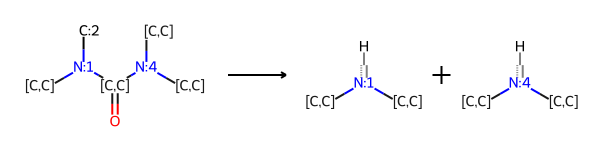

In [37]:
#urea=AllChem.ReactionFromSmarts('[#7X3;!$([#7:1][!#6])][#6X3:7](=[OX1])[#7X3;!$([#7:4][!#6])]>>[H][#7:1](-[#1,#6:2])-[#1,#6:3].[H][#7:4](-[#1,#6:5])-[#1,#6:6]')
#urea=AllChem.ReactionFromSmarts('[#1,#6:2]-[#7X3:1](-[#1,#6:3])-[#6X3:7](=[OX1])-[#7X3:4](-[#1,#6:6])-[#1,#6:5]>>[H][#7:1](-[#1,#6:2])-[#1,#6:3].[H][#7:4](-[#1,#6:5])-[#1,#6:6]')
urea=AllChem.ReactionFromSmarts('[CH:2]-[#7:1](-[C,c:3])-[C,c:7](=O)-[#7:4](-[C,c:5])-[C,c:6]>>[H][#7:1](-[C,c:2])-[C,c:3].[H][#7:4](-[C,c:5])-[C,c:6]')
urea

In [ ]:
display(Draw.ReactionToImage(urea))

for x in examples[examples['ID']==12].index:
    par=examples['Parent'][x]
    prod1=examples['Product1'][x]
    prod2=examples['Product2'][x]
    parent=Chem.MolFromSmiles(par)
    product1=Chem.MolFromSmiles(prod1)
    #product2=Chem.MolFromSmiles(prod2)
    print('EXAMPLE')
    display(Draw.MolsToGridImage([parent,product1,product2]))
    #display(Draw.MolsToGridImage([parent,product1]))
    #ps=urea.RunReactants((parent,))
    print(len(ps))
    
    for i in range(len(ps)):
        current_mol=ps[i][0]
        smi=Chem.MolToSmiles(current_mol)
        f=RemoveSymDups(smi,current_mol)
        #print(final)

    print('PREDICTED')
    display(Chem.Draw.MolsToGridImage(f))

In [ ]:
test=Chem.MolFromSmiles('CN(C)C(=O)N(C)C')
res=urea.RunReactants((test,))

for i in range(len(res)):
    current_mol=res[i][0]
    smi=Chem.MolToSmiles(current_mol)
    final=RemoveSymDups(smi,current_mol)
display(Chem.Draw.MolsToGridImage(final))


The reaction smarts string is having a hard time recognizing the examples.

In [ ]:
urea_sub=AllChem.ReactionFromSmarts('[#7X3;!$([#7][!#6])][#6X3](=[OX1])[#7X3;!$([#7][!#6])>>[#7X3;!$([#7][!#6])][#6X3].[#7X3;!$([#7][!#6])')
urea_sub

In [33]:
results[results['ID']==12]

,ID,Scheme,Parent,Product1,std_Product1,pred_std_Product1,Match
43,12,AbiHyd: Urea Hydrolysis,CC1C(SC(=O)N1C(=O)NC1CCCCC1)C1=CC=C(Cl)C=C1,NC1CCCCC1,NC1CCCCC1,NA,Did not run
44,12,AbiHyd: Urea Hydrolysis,CC(C)C1=CC=C(NC(=O)N(C)C)C=C1,CC(C)C1=CC=C(N)C=C1,CC(C)c1ccc(N)cc1,NA,Did not run
45,12,AbiHyd: Urea Hydrolysis,ClC1=CC=C(CN(C2CCCC2)C(=O)NC2=CC=CC=C2)C=C1,ClC1=CC=C(CNC2CCCC2)C=C1,Clc1ccc(CNC2CCCC2)cc1,NA,Did not run


In [34]:
results[results['ID']==11]

,ID,Scheme,Parent,Product1,std_Product1,pred_std_Product1,Match
38,11,AbiHyd: Carbamate Hydrolysis,CNC(=O)OC1=CC=C(C=C1)[N+]([O-])=O,OC1=CC=C(C=C1)[N+]([O-])=O,O=[N+]([O-])c1ccc(O)cc1,NA,Did not run
39,11,AbiHyd: Carbamate Hydrolysis,CNC(=O)OC1=C2C=CC=CC2=CC=C1,CN,CN,NA,Did not run
40,11,AbiHyd: Carbamate Hydrolysis,CNC(=O)OC1=CC=CC=C1OC(C)C,CN,CN,NA,Did not run
41,11,AbiHyd: Carbamate Hydrolysis,CNC(=O)OC1=C2OC(C)(C)CC2=CC=C1,CN,CN,NA,Did not run
42,11,AbiHyd: Carbamate Hydrolysis,CNC(=O)OC1=CC(C)=C(SC)C(C)=C1,CSC1=C(C)C=C(O)C=C1C,CSc1c(C)cc(O)cc1C,NA,Did not run


In [35]:
results[results['ID']==10]

,ID,Scheme,Parent,Product1,std_Product1,pred_std_Product1,Match
32,10,AbiHyd: Amide Hydrolysis,CC(C)(CC#N)NC(=O)C1=CC(Cl)=CC(Cl)=C1,OC(=O)C1=CC(Cl)=CC(Cl)=C1,O=C(O)c1cc(Cl)cc(Cl)c1,NA,Did not run
33,10,AbiHyd: Amide Hydrolysis,FC(F)(F)OC1=CC=C(NC(=O)NC(=O)C2=CC=CC=C2Cl)C=C1,OC(=O)C1=CC=CC=C1Cl,O=C(O)c1ccccc1Cl,NA,Did not run
34,10,AbiHyd: Amide Hydrolysis,FC1=CC=CC(F)=C1C(=O)NC(=O)NC1=CC=C(Cl)C=C1,OC(=O)C1=C(F)C=CC=C1F,O=C(O)c1c(F)cccc1F,NA,Did not run
35,10,AbiHyd: Amide Hydrolysis,FC(C(F)(F)F)C(F)(F)OC1=C(Cl)C=C(NC(=O)NC(=O)C2...,OC(=O)C1=C(F)C=CC=C1F,O=C(O)c1c(F)cccc1F,NA,Did not run
36,10,AbiHyd: Amide Hydrolysis,FC1=CC=CC(F)=C1C(=O)NC(=O)NC1=CC=C(OC2=C(Cl)C=...,OC(=O)C1=C(F)C=CC=C1F,O=C(O)c1c(F)cccc1F,NA,Did not run
37,10,AbiHyd: Amide Hydrolysis,CCC(=O)NC1=CC(Cl)=C(Cl)C=C1,CCC(O)=O,CCC(=O)O,NA,Did not run


In [38]:
results[results['ID']==9]

,ID,Scheme,Parent,Product1,std_Product1,pred_std_Product1,Match
30,9,AbiHyd: Anhydride Hydrolysis,CC(=O)OC(C)=O,CC(O)=O,CC(=O)O,CC(=O)O,Pass
31,9,AbiHyd: Anhydride Hydrolysis,CC(C)(C)C(=O)OC(=O)C(C)(C)C,CC(C)(C)C(O)=O,CC(C)(C)C(=O)O,CC(C)(C)C(=O)O,Pass
